In [16]:
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib


import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
#scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import xlrd
from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, Ridge  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection #might be model_selection <--- this is the new one
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Normalizer
import xgboost as xgb


sns.set_style("whitegrid")
%matplotlib inline

scipy: 0.19.1
numpy: 1.12.1
matplotlib: 2.0.2
pandas: 0.20.3
sklearn: 0.19.0


In [17]:
data = pd.read_excel('ATTENDEEISSA2017NumericalExcelCleaned.xlsx', header = 0)
#data_antendees = pd.read_excel('HW3Data.xlsx', sheetname = 'trainY')

In [18]:
#data_a, data_b = train_test_split(data, test_size=0.2, random_state = 7)

In [19]:
data.shape

(760, 165)

In [20]:
data_a = data.apply(pd.to_numeric, errors='ignore')    #changes dataframe dtypes to their lowest

In [21]:
#cols = list(data_a)    # THIS DROPS ALL COLUMNS THAT HAVE THE SAME VALUE AND IGNORES NANS SO BE CAREFUL
#nunique = data_a.apply(pd.Series.nunique)
#cols_to_drop = nunique[nunique == 1].index
#cols_to_drop
#data_a = data_a.drop(cols_to_drop, axis=1)

In [22]:
data_a = data.drop('Collector ID', axis = 1)

In [23]:
data_a.shape

(760, 164)

In [24]:
#data_a = data_a.loc[: , ~data_a.columns.duplicated()]#i think this is only column name

In [25]:
data_a = data_a.T.drop_duplicates().T

In [26]:
data_a.shape

(760, 156)

In [27]:
data_a = data_a.dropna(axis=1, how='all')

In [28]:
data_a = data_a.dropna(axis=0, how='all')

In [29]:
data_a.shape

(759, 155)

In [30]:
data_a = data_a.apply(pd.to_numeric, errors='ignore') 

In [81]:
corr = data_a.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()


In [18]:
testcorr = corr.dropna(axis=1, how='all')

In [19]:
testcorr = testcorr.dropna(axis=0, how='all')

In [20]:
plt.figure(figsize=(150, 150))
sns.heatmap(testcorr,vmin=-1, vmax=1, square=True)

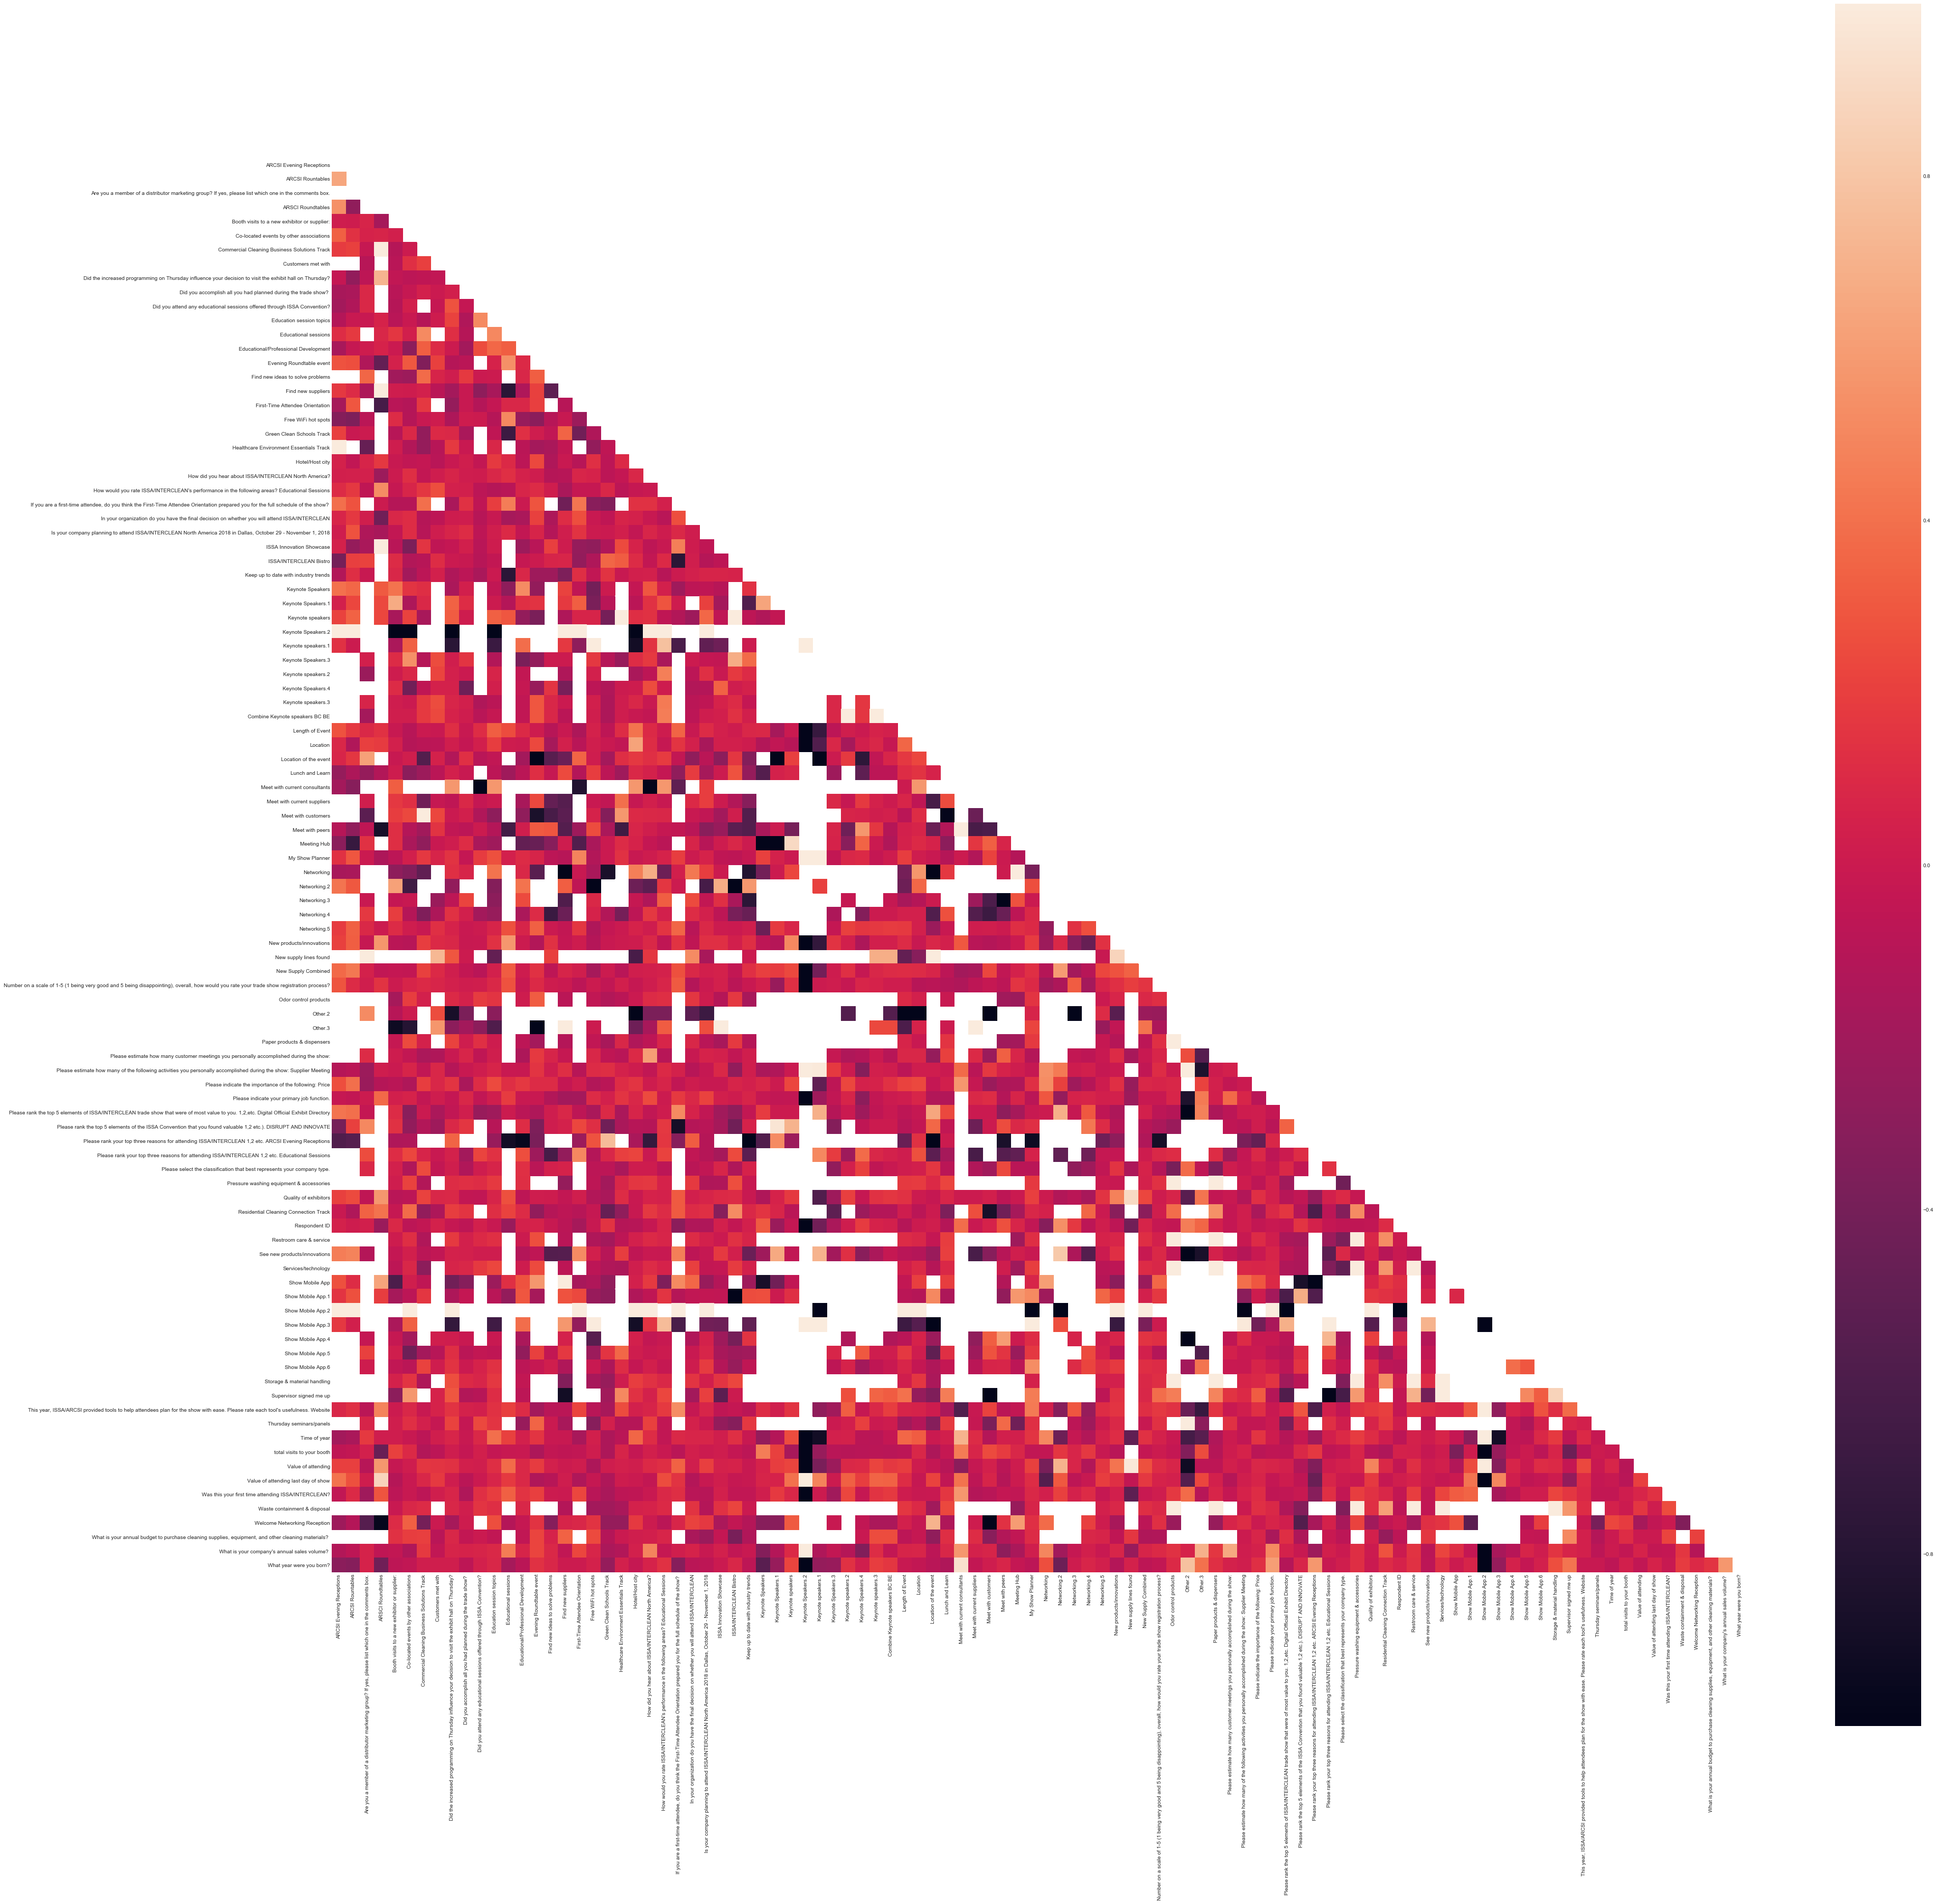

In [21]:
mask = np.zeros_like(testcorr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(testcorr, mask=mask, vmin = -1, vmax=1, square=True)

In [31]:
sum_happy = []
for a in range(0,len(data_a.iloc[:,41])):
    if data_a.iloc[a,41] == 5 or data_a.iloc[a,41]==4:
        sum_happy.append(3)
    elif data_a.iloc[a,41] == 3:
        sum_happy.append(2)
    elif data_a.iloc[a,41] ==2 or data_a.iloc[a,41]==1:
        sum_happy.append(1)

        

In [32]:
data_a = data_a[np.isfinite(data_a['Is your company planning to attend ISSA/INTERCLEAN North America 2018 in Dallas, October 29 - November 1, 2018'])] #drop rows that dont have company planning to attend

In [33]:
data_a['sum_happy'] = sum_happy

In [34]:
data_a.shape

(513, 156)

In [35]:
data_a[data_a['How did you hear about ISSA/INTERCLEAN North America?'] > 15].index

Int64Index([234], dtype='int64')

In [36]:
data_a = data_a.drop(234, axis = 0)

In [37]:
data_a[data_a['First-Time Attendee Orientation'] > 15].index

Int64Index([458, 725], dtype='int64')

In [38]:
data_a = data_a.drop([458, 725], axis = 0)

In [39]:
data_Y = data_a['sum_happy']

In [40]:
data_X = data_a

In [44]:
data_X = data_X.drop(['IP Address','Respondent ID'], axis = 1)

In [45]:
data_X = data_X.drop(['Is your company planning to attend ISSA/INTERCLEAN North America 2018 in Dallas, October 29 - November 1, 2018'],axis = 1)

In [46]:
data_X = data_X.drop(['sum_happy'],axis=1)

In [47]:
data_X.shape

(510, 152)

In [48]:
data_X = data_X.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:]

In [49]:
data_X = data_X.astype(float)

In [50]:
data_Y = data_Y.astype(float)

In [51]:
data_X.to_pickle("data_X.pickle")

In [53]:
data_Y.to_pickle("data_Y.pickle")

In [52]:
data_X = pd.read_pickle("data_X.pickle")

In [54]:
data_Y = pd.read_pickle("data_Y.pickle")

In [55]:
data_X_hold_X = data_X[data_X.columns[data_X.max() > 15]]
data_X_hold_columns = data_X.columns[data_X.max() > 15]

In [56]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(data_X_hold_X)
data_T=imp.transform(data_X_hold_X)

In [57]:
data_X.loc[0:510,data_X_hold_columns] = pd.DataFrame(data_T, columns = data_X_hold_columns)

In [58]:
data_X['Commercial Cleaning Business Solutions Track'].isnull().index[1]

2

In [59]:
data_X.columns[data_X.max() > 15]


Index([u'Booth visits to a new exhibitor or supplier:',
       u'Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting',
       u'total visits to your booth', u'What year were you born?'],
      dtype='object')

In [8]:
for a in data_X.columns[data_X.max() > 15]:
    for idx, val in enumerate(data_X[a].isnull()):
        print idx, val

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


453 False
454 False
455 False
456 False
457 False
458 True
459 True
460 True
461 False
462 False
463 False
464 False
465 False
466 False
467 False
468 False
469 True
470 False
471 False
472 False
473 False
474 False
475 True
476 False
477 False
478 False
479 False
480 False
481 False
482 False
483 True
484 True
485 True
486 True
487 True
488 True
489 True
490 True
491 True
492 True
493 True
494 True
495 True
496 True
497 True
498 True
499 True
500 True
501 True
502 True
503 True
504 True
505 True
506 True
507 True
508 True
509 True
0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 F

215 False
216 False
217 False
218 False
219 False
220 False
221 False
222 False
223 False
224 False
225 False
226 False
227 False
228 False
229 False
230 False
231 False
232 False
233 False
234 False
235 False
236 False
237 False
238 False
239 False
240 False
241 False
242 False
243 False
244 False
245 False
246 False
247 False
248 False
249 False
250 False
251 False
252 False
253 False
254 False
255 False
256 False
257 False
258 False
259 False
260 False
261 False
262 False
263 False
264 False
265 False
266 False
267 False
268 False
269 False
270 False
271 False
272 False
273 False
274 False
275 False
276 False
277 False
278 False
279 False
280 False
281 False
282 False
283 False
284 False
285 False
286 False
287 False
288 False
289 False
290 False
291 False
292 False
293 False
294 False
295 False
296 False
297 False
298 False
299 False
300 False
301 False
302 False
303 False
304 False
305 False
306 False
307 False
308 False
309 False
310 False
311 False
312 False
313 False
314 False


In [60]:
 
for a in data_X.columns[data_X.max() > 15]:
    for idx, val in enumerate(data_X[a].isnull()):
        if val:
            data_X[a][data_X[a].isnull().index[idx]] = data_X[a].mean()
        
      
            
   

In [61]:
data_X = pd.get_dummies(data_X, dummy_na = True, columns = data_X.columns[data_X.max() < 15])

In [12]:
data_X

Booth visits to a new exhibitor or supplier:  \
1                                        7.000000   
2                                       10.000000   
3                                       10.000000   
4                                       40.000000   
5                                       15.000000   
7                                       27.122857   
9                                       27.122857   
10                                       8.000000   
11                                     100.000000   
12                                      27.122857   
13                                      10.000000   
14                                      25.000000   
15                                       8.000000   
16                                      27.122857   
17                                      27.122857   
18                                      50.000000   
19                                      27.122857   
20                                      27.122857   
21                                       8.000000   
22                                      25.000000   
23                                      50.000000   
24                                      27.122857   
25                                       5.000000   
27                                      10.000000   
28                                       5.000000   
29                                       2.000000   
30                                       7.000000   
31                                      35.000000   
34                                      10.000000   
35                                     200.000000   
..                                            ...   
707                                     30.000000   
717                                      5.000000   
719                                     12.000000   
721                                     27.059574   
722                                     27.059574   
723                                     27.059574   
726                                     27.059574   
727                                     27.059574   
730                                     27.059574   
731                                     27.059574   
733                                     27.059574   
734                                     27.059574   
735                                     27.059574   
736                                     27.059574   
737                                     27.059574   
738                                     27.059574   
739                                     27.059574   
740                                     27.059574   
742                                     27.059574   
744                                     27.059574   
745                                     27.059574   
746                                     27.059574   
747                                     27.059574   
748                                     27.059574   
749                                     27.059574   
752                                     27.059574   
753                                     27.059574   
754                                     27.059574   
755                                     27.059574   
756                                     27.059574   

     Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting  \
1                                            20.000000                                                                    
2                                            20.000000                                                                    
3                                            25.000000                                                                    
4                                             5.000000                                                                    
5                                            20.000000                                                 

In [56]:
y_test = pd.get_dummies(data_Y)

In [57]:
Z=[]
Z=pd.concat([data_X,y_test],axis=1)

In [58]:
pd.options.display.max_columns =  100

In [59]:
Z

Booth visits to a new exhibitor or supplier:  \
1                                        7.000000   
2                                       10.000000   
3                                       10.000000   
4                                       40.000000   
5                                       15.000000   
7                                       27.122857   
9                                       27.122857   
10                                       8.000000   
11                                     100.000000   
12                                      27.122857   
13                                      10.000000   
14                                      25.000000   
15                                       8.000000   
16                                      27.122857   
17                                      27.122857   
18                                      50.000000   
19                                      27.122857   
20                                      27.122857   
21                                       8.000000   
22                                      25.000000   
23                                      50.000000   
24                                      27.122857   
25                                       5.000000   
27                                      10.000000   
28                                       5.000000   
29                                       2.000000   
30                                       7.000000   
31                                      35.000000   
34                                      10.000000   
35                                     200.000000   
..                                            ...   
707                                     30.000000   
717                                      5.000000   
719                                     12.000000   
721                                     27.059574   
722                                     27.059574   
723                                     27.059574   
726                                     27.059574   
727                                     27.059574   
730                                     27.059574   
731                                     27.059574   
733                                     27.059574   
734                                     27.059574   
735                                     27.059574   
736                                     27.059574   
737                                     27.059574   
738                                     27.059574   
739                                     27.059574   
740                                     27.059574   
742                                     27.059574   
744                                     27.059574   
745                                     27.059574   
746                                     27.059574   
747                                     27.059574   
748                                     27.059574   
749                                     27.059574   
752                                     27.059574   
753                                     27.059574   
754                                     27.059574   
755                                     27.059574   
756                                     27.059574   

     Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting  \
1                                            20.000000                                                                    
2                                            20.000000                                                                    
3                                            25.000000                                                                    
4                                             5.000000                                                                    
5                                            20.000000                                                 

In [183]:
corr = Z.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

In [184]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [45]:
X

Booth visits to a new exhibitor or supplier:  \
1                                        7.000000   
2                                       10.000000   
3                                       10.000000   
4                                       40.000000   
5                                       15.000000   
7                                       27.122857   
9                                       27.122857   
10                                       8.000000   
11                                     100.000000   
12                                      27.122857   
13                                      10.000000   
14                                      25.000000   
15                                       8.000000   
16                                      27.122857   
17                                      27.122857   
18                                      50.000000   
19                                      27.122857   
20                                      27.122857   
21                                       8.000000   
22                                      25.000000   
23                                      50.000000   
24                                      27.122857   
25                                       5.000000   
27                                      10.000000   
28                                       5.000000   
29                                       2.000000   
30                                       7.000000   
31                                      35.000000   
34                                      10.000000   
35                                     200.000000   
..                                            ...   
707                                           NaN   
717                                           NaN   
719                                           NaN   
721                                           NaN   
722                                           NaN   
723                                           NaN   
726                                           NaN   
727                                           NaN   
730                                           NaN   
731                                           NaN   
733                                           NaN   
734                                           NaN   
735                                           NaN   
736                                           NaN   
737                                           NaN   
738                                           NaN   
739                                           NaN   
740                                           NaN   
742                                           NaN   
744                                           NaN   
745                                           NaN   
746                                           NaN   
747                                           NaN   
748                                           NaN   
749                                           NaN   
752                                           NaN   
753                                           NaN   
754                                           NaN   
755                                           NaN   
756                                           NaN   

     Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting  \
1                                            20.000000                                                                    
2                                            20.000000                                                                    
3                                            25.000000                                                                    
4                                             5.000000                                                                    
5                                            20.000000                                                 

In [62]:
X = data_X
y = data_Y

In [61]:
scaler = Normalizer().fit(X)   # always want to save the value you returned
normalizedX = scaler.transform(X)
X = normalizedX


In [62]:
#data_X = data_X.fillna(-1)

In [63]:
#scikit-learn indeed strips the column headers in most cases, so just add them back on afterward. 
#In your example, with X_imputed as the sklearn.preprocessing output and X_train as the original dataframe, 
#you can put the column headers back on with:

#X_imputed_df = pd.DataFrame(X_imputed, columns = X_train.columns)

In [335]:

num_folds = 10
num_instances = len(X) 
seed = 7
scoring = None



In [64]:
models=[]
models.append(('LR', LogisticRegression(class_weight = 'balanced', random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(class_weight = 'balanced',random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.570588 (0.054374)
NB: 0.305882 (0.068599)
CART: 0.523529 (0.063264)
KNeighborsClassifier: 0.658824 (0.051281)
XGBClassifier: 0.670588 (0.049449)
GradientBoostingClassifier: 0.645098 (0.060404)
AdaBoostClassifier: 0.607843 (0.055459)
RandomForestClassifier: 0.662745 (0.049449)
ExtraTreesClassifier: 0.672549 (0.051915)
DecisionTreeClassifier: 0.523529 (0.063264)


In [65]:
estimator = ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 74
Feature Ranking: [  1   1   1   1 157 190 205 180 251 229 259 168 239 267 209 151 139 148
  17 281 250 254 210   1  16 117 114 118 224  95   1 115 282 241 260 269
 125   1  23   1  22 188 283   1   1 280   1   1 318  75   1 329   1  13
   9  87 176 129 330 361 386 169  32  45 106 105 295  92   1   1 364 257
 404 303 294 109   1  33  96 111 246  27  57  80 144   1 285 276 355 278
 298 184   1  88 107  21 166 142 234  68 150   1  20 194 387 405 167 134
 249  98 165 247 307  51   1   1  41 328 337 233 204 226 312 195  43 161
   1 327 421 359  55 427  90   1  54  18 197 425 219 296 353  60 141 351
  83  56  67 273 258   1 396 232 222 171 131   1   3  66  30   1 341 406
 316 369 347 189 429 345 313 419 342 348 415 323 370 412 292 275 410 350
 365 371 390 426 430 395 373 207 305  97 170 198  91 203 193  86 343 211
 214 306 304 147 146 223  76   4 216   1 116 225 133  25  48 301  12   1
   1 368 391 231   1   1 103 346 385 183 135 179 132   1 199 213 128 332
 407  34 399 30

In [66]:
new_features = [] 
for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == 1:
            new_features.append(b)
            print b, data_X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
2 total visits to your booth
3 What year were you born?
23 Cleaning tools & supplies_2.0
30 Co-located events by other associations_nan
37 Customers met with_0.0
39 Customers met with_2.0
43 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
44 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
46 Did you accomplish all you had planned during the trade show? _1.0
47 Did you accomplish all you had planned during the trade show? _2.0
50 Did you attend any educational sessions offered through ISSA Convention?_2.0
52 Education session topics_1.0
68 Equipment & accessories_3.0
69 Equipment & accessories_nan
76 Facility maintenance & safety supply_4.0
85 Find new suppliers_nan
92 Floor carpet care_5.0
101 Free WiFi h

In [67]:
new_X = data_X.iloc[:,new_features]

In [68]:
X = new_X

In [69]:
X.shape

(510, 74)

In [215]:
y_test = pd.get_dummies(y)

In [216]:
Z=[]
Z=pd.concat([X,y_test],axis=1)

In [219]:
corr = Z.select_dtypes(include = ['int64', 'float64', 'uint8']).iloc[:, 1:].corr()

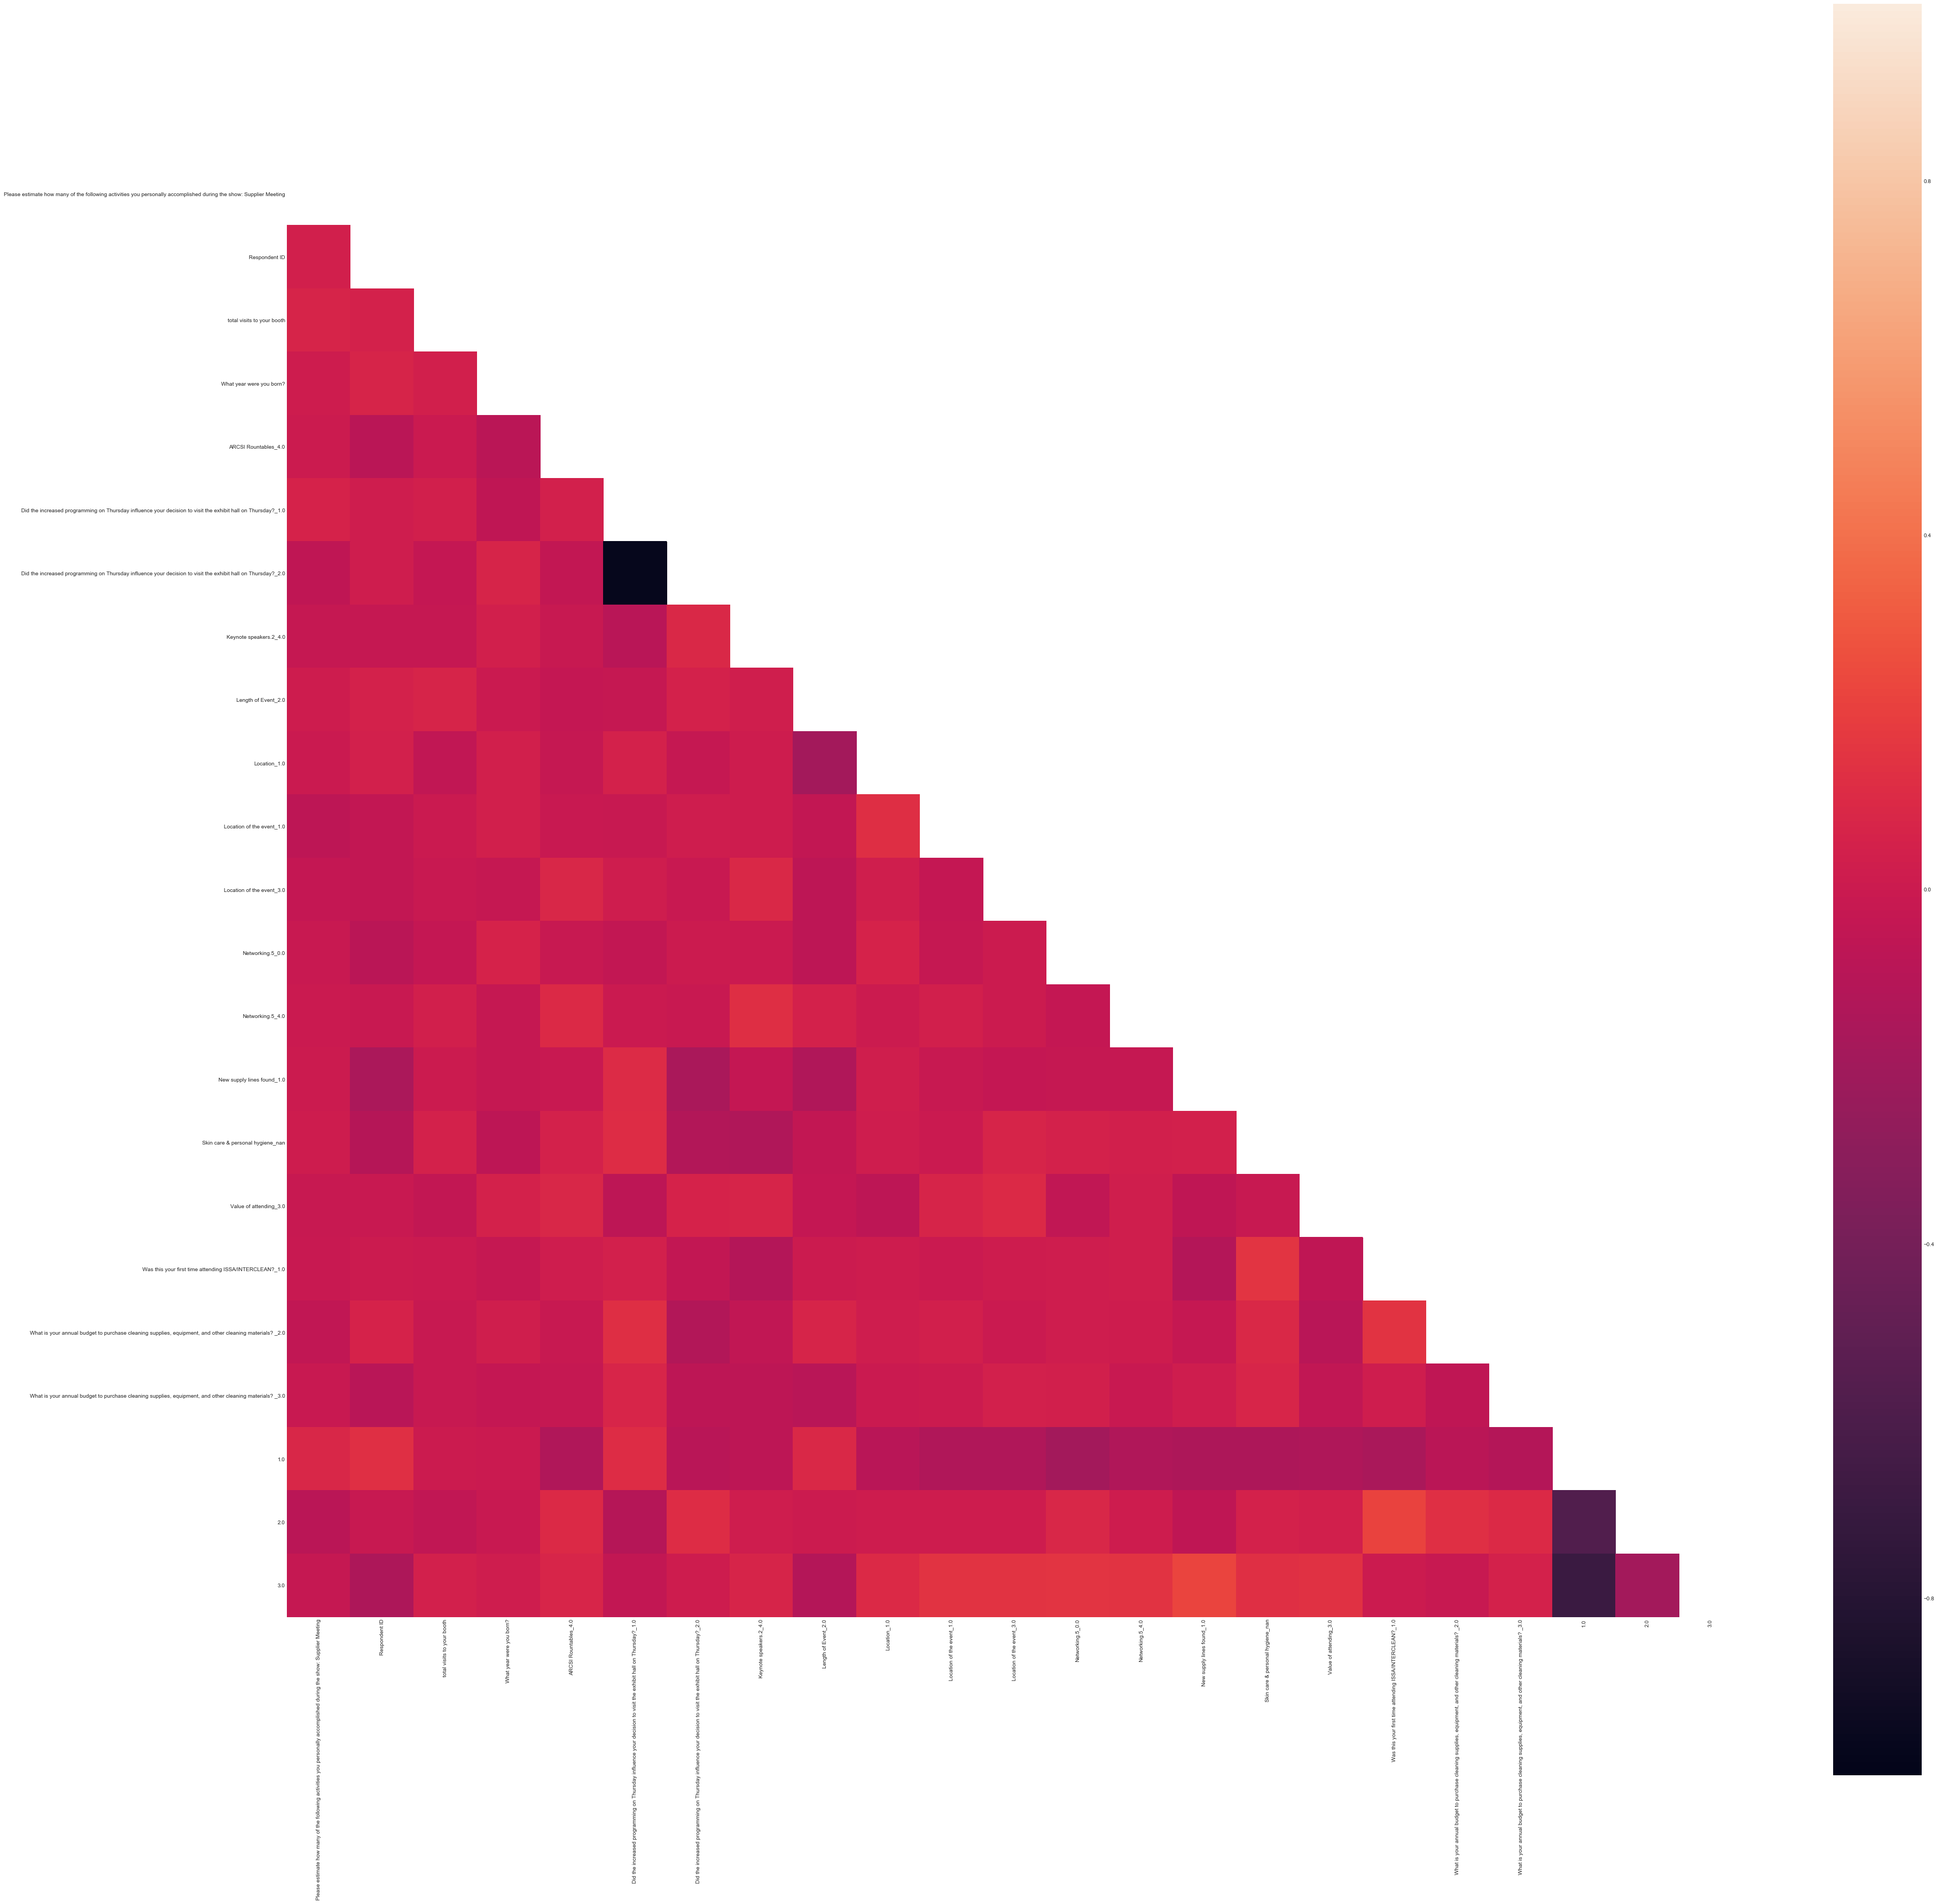

In [220]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [70]:
first_new_f = X

In [71]:
X = first_new_f

In [72]:
models=[]
models.append(('LR', LogisticRegression(class_weight = 'balanced', random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(class_weight = 'balanced',random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.588235 (0.048029)
NB: 0.519608 (0.075560)
CART: 0.549020 (0.061382)
KNeighborsClassifier: 0.649020 (0.042464)
XGBClassifier: 0.682353 (0.041871)
GradientBoostingClassifier: 0.674510 (0.048980)
AdaBoostClassifier: 0.629412 (0.055770)
RandomForestClassifier: 0.676471 (0.055632)
ExtraTreesClassifier: 0.674510 (0.045733)
DecisionTreeClassifier: 0.549020 (0.061382)


In [73]:
estimator = ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 71
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [74]:
top_71_important_features = [] 
for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == 1:
            top_71_important_features.append(b)
            print b,X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
2 total visits to your booth
3 What year were you born?
4 Cleaning tools & supplies_2.0
5 Co-located events by other associations_nan
6 Customers met with_0.0
7 Customers met with_2.0
8 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
9 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
10 Did you accomplish all you had planned during the trade show? _1.0
11 Did you accomplish all you had planned during the trade show? _2.0
12 Did you attend any educational sessions offered through ISSA Convention?_2.0
13 Education session topics_1.0
14 Equipment & accessories_3.0
15 Equipment & accessories_nan
16 Facility maintenance & safety supply_4.0
17 Find new suppliers_nan
18 Floor carpet care_5.0
19 Free WiFi hot spot

In [75]:
new_X = X.iloc[:,top_71_important_features]


In [76]:
X = new_X

In [77]:
top_71_important_features_X = X

In [79]:
models=[]
models.append(('LR', LogisticRegression(class_weight = 'balanced', random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(class_weight = 'balanced',random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.584314 (0.056693)
NB: 0.535294 (0.066233)
CART: 0.547059 (0.082470)
KNeighborsClassifier: 0.645098 (0.051468)
XGBClassifier: 0.680392 (0.035130)
GradientBoostingClassifier: 0.668627 (0.050716)
AdaBoostClassifier: 0.627451 (0.058166)
RandomForestClassifier: 0.680392 (0.053375)
ExtraTreesClassifier: 0.684314 (0.055770)
DecisionTreeClassifier: 0.547059 (0.082470)


In [270]:
y_dummy = pd.get_dummies(y)

In [271]:
Z.dtypes

NameError: name 'Z' is not defined

In [272]:
Z=[]
Z=pd.concat([X,y_dummy],axis=1)

In [273]:
corr = Z.select_dtypes(include = ['uint8', 'int64', 'float64']).iloc[:, 1:].corr()

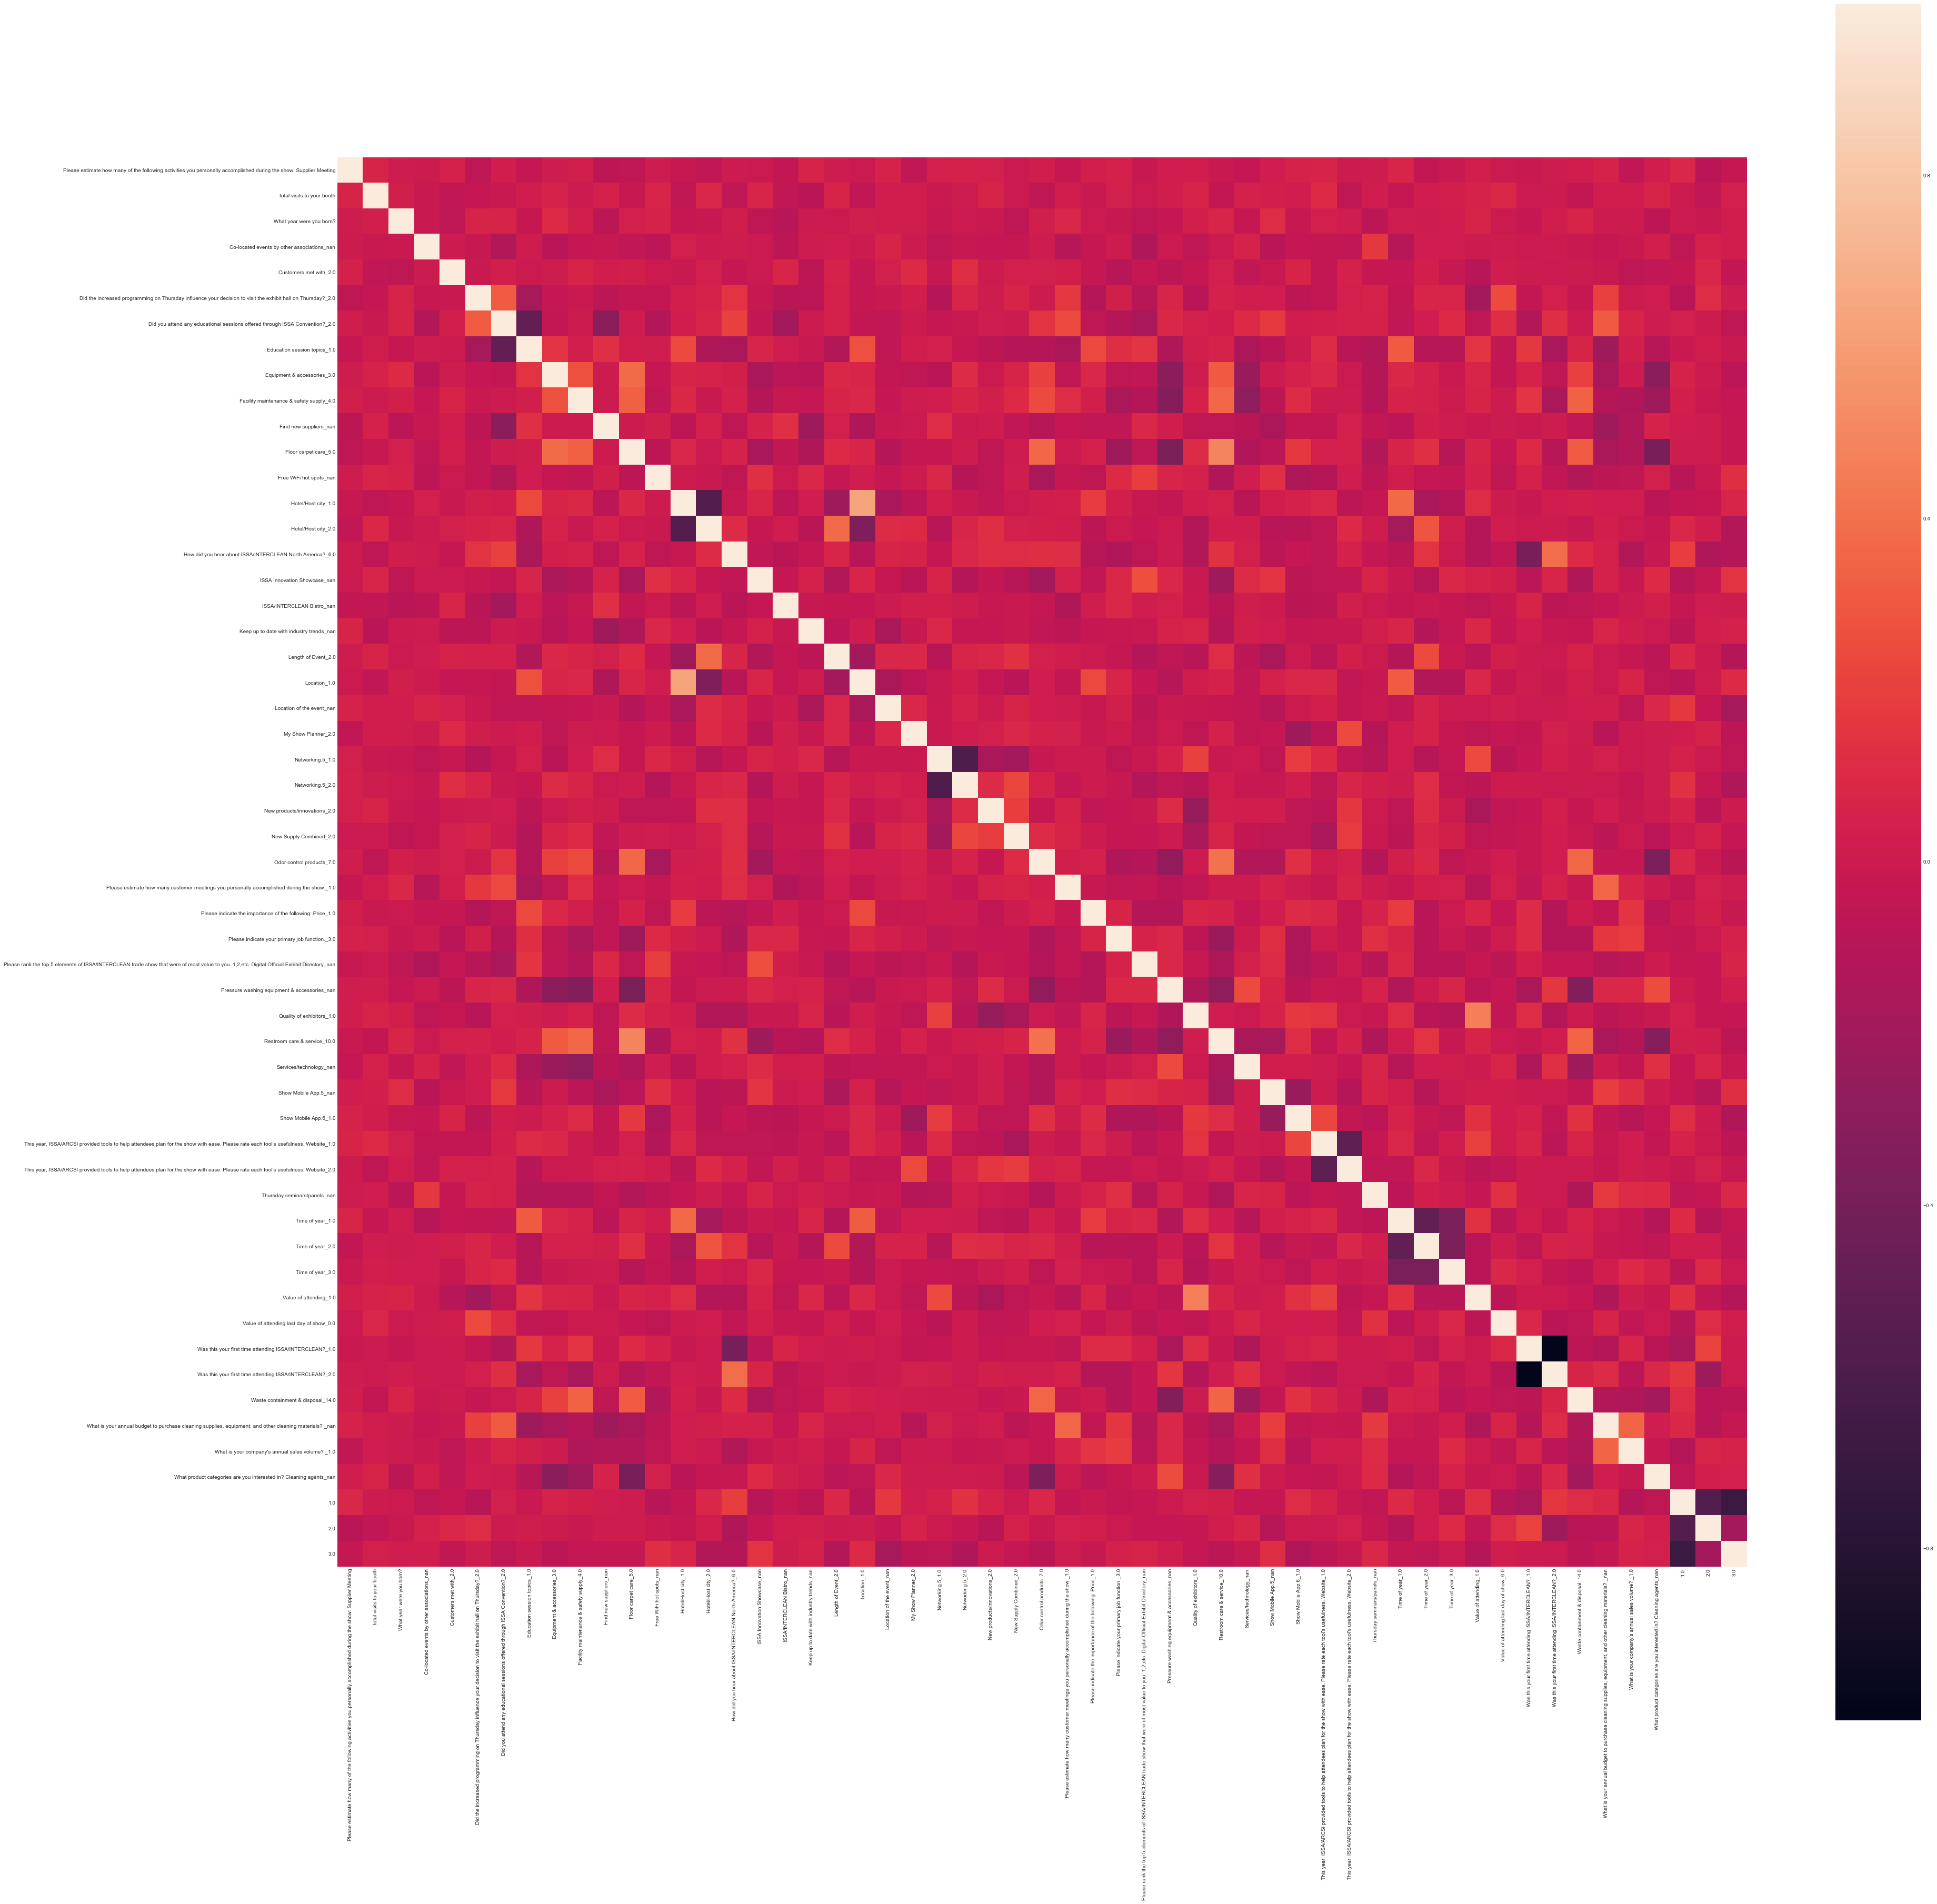

In [276]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr,  vmin = -1, vmax=1, square=True)

In [80]:
ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 61
Feature Ranking: [ 1  1  1  1  1  1  1  1  3  1  8  1  1  1  1 11  1  1  1  1  1  1  1  1  1
  1  1  1 10  1  1  1  5  1  1  1  6  1  1  1  1  4  1  1  1  1  1  1  1  9
  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  7  1]


In [81]:
top_61_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_61_important_features.append(b)
        print b, X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
2 total visits to your booth
3 What year were you born?
4 Cleaning tools & supplies_2.0
5 Co-located events by other associations_nan
6 Customers met with_0.0
7 Customers met with_2.0
9 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
11 Did you accomplish all you had planned during the trade show? _2.0
12 Did you attend any educational sessions offered through ISSA Convention?_2.0
13 Education session topics_1.0
14 Equipment & accessories_3.0
16 Facility maintenance & safety supply_4.0
17 Find new suppliers_nan
18 Floor carpet care_5.0
19 Free WiFi hot spots_nan
20 Hotel/Host city_1.0
21 Hotel/Host city_2.0
22 How did you hear about ISSA/INTERCLEAN North America?_6.0
23 ISSA Innovation Showcase_nan
24 ISSA/INTERCLEAN Bistro_nan
25 Keep up to date with industry tren

In [82]:
new_X = X.iloc[:,top_61_important_features]
X = new_X

In [251]:
top_91_important_features_X

NameError: name 'top_91_important_features_X' is not defined

In [83]:
top_61_important_features_X = X

In [372]:
#X= top_91_important_features_X

In [85]:
models=[]
models.append(('LR', LogisticRegression(class_weight = 'balanced', random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(class_weight = 'balanced',random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(class_weight = 'balanced',random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.586275 (0.068178)
NB: 0.535294 (0.069074)
CART: 0.556863 (0.052025)
KNeighborsClassifier: 0.639216 (0.052759)
XGBClassifier: 0.676471 (0.041363)
GradientBoostingClassifier: 0.670588 (0.039019)
AdaBoostClassifier: 0.617647 (0.052062)
RandomForestClassifier: 0.672549 (0.048862)
ExtraTreesClassifier: 0.680392 (0.054091)
DecisionTreeClassifier: 0.556863 (0.052025)


In [86]:
estimator = ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 53
Feature Ranking: [1 1 1 1 8 1 3 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 2 1 1 1 1 1 1 1 1 4
 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1]


In [87]:
top_53_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_53_important_features.append(b)
        print b, X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
2 total visits to your booth
3 What year were you born?
5 Co-located events by other associations_nan
7 Customers met with_2.0
8 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
10 Did you attend any educational sessions offered through ISSA Convention?_2.0
11 Education session topics_1.0
12 Equipment & accessories_3.0
13 Facility maintenance & safety supply_4.0
14 Find new suppliers_nan
15 Floor carpet care_5.0
16 Free WiFi hot spots_nan
17 Hotel/Host city_1.0
18 Hotel/Host city_2.0
19 How did you hear about ISSA/INTERCLEAN North America?_6.0
20 ISSA Innovation Showcase_nan
21 ISSA/INTERCLEAN Bistro_nan
22 Keep up to date with industry trends_nan
24 Length of Event_2.0
25 Location_1.0
26 Location of the event_nan
28 My Show Planner_2.0
29 Networking.5_1.0
30 Networ

In [88]:
new_X = X.iloc[:,top_53_important_features]

In [89]:
X = new_X

In [106]:
#top_53_important_features = X
X = top_53_important_features

In [351]:

models=[]
models.append(('LR', LogisticRegression(class_weight = 'balanced', random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors =  25, weights = 'distance'))) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.641712 (0.023587)
NB: 0.645504 (0.025234)
KNeighborsClassifier: 0.666722 (0.051898)
XGBClassifier: 0.833828 (0.017603)
GradientBoostingClassifier: 0.843443 (0.020879)
AdaBoostClassifier: 0.717537 (0.034474)
RandomForestClassifier: 0.790595 (0.016962)
ExtraTreesClassifier: 0.867436 (0.032403)
DecisionTreeClassifier: 0.705128 (0.053305)


In [143]:
model = RandomForestClassifier(class_weight = 'balanced',random_state = seed)
model.fit(X,y)
#test_preds = model.predict(test_X)
array = model.predict(X)
probab = model.predict_proba(X)

In [137]:
for idx, val in enumerate(probab):
    print(idx, val)

(0, array([ 0.9,  0. ,  0.1]))
(1, array([ 1.,  0.,  0.]))
(2, array([ 0.8,  0.1,  0.1]))
(3, array([ 0. ,  0.9,  0.1]))
(4, array([ 0.9,  0.1,  0. ]))
(5, array([ 0.4,  0.6,  0. ]))
(6, array([ 0.7,  0.1,  0.2]))
(7, array([ 0.9,  0. ,  0.1]))
(8, array([ 0.2,  0.4,  0.4]))
(9, array([ 0.9,  0. ,  0.1]))
(10, array([ 0.9,  0. ,  0.1]))
(11, array([ 0.9,  0. ,  0.1]))
(12, array([ 0.9,  0.1,  0. ]))
(13, array([ 0.9,  0. ,  0.1]))
(14, array([ 1.,  0.,  0.]))
(15, array([ 1.,  0.,  0.]))
(16, array([ 1.,  0.,  0.]))
(17, array([ 0.9,  0.1,  0. ]))
(18, array([ 1.,  0.,  0.]))
(19, array([ 1.,  0.,  0.]))
(20, array([ 1.,  0.,  0.]))
(21, array([ 0.7,  0.2,  0.1]))
(22, array([ 0.9,  0.1,  0. ]))
(23, array([ 0.6,  0. ,  0.4]))
(24, array([ 0.9,  0.1,  0. ]))
(25, array([ 1.,  0.,  0.]))
(26, array([ 0.9,  0.1,  0. ]))
(27, array([ 0.8,  0.2,  0. ]))
(28, array([ 0.9,  0. ,  0.1]))
(29, array([ 1.,  0.,  0.]))
(30, array([ 0.6,  0.3,  0.1]))
(31, array([ 0.7,  0.2,  0.1]))
(32, array([ 

In [138]:
for idx, val in enumerate(y):
    print (idx, val)

(0, 1.0)
(1, 1.0)
(2, 1.0)
(3, 2.0)
(4, 1.0)
(5, 2.0)
(6, 1.0)
(7, 1.0)
(8, 2.0)
(9, 1.0)
(10, 1.0)
(11, 1.0)
(12, 1.0)
(13, 1.0)
(14, 1.0)
(15, 1.0)
(16, 1.0)
(17, 1.0)
(18, 1.0)
(19, 1.0)
(20, 1.0)
(21, 1.0)
(22, 1.0)
(23, 3.0)
(24, 1.0)
(25, 1.0)
(26, 1.0)
(27, 1.0)
(28, 1.0)
(29, 1.0)
(30, 1.0)
(31, 1.0)
(32, 1.0)
(33, 1.0)
(34, 1.0)
(35, 1.0)
(36, 1.0)
(37, 1.0)
(38, 1.0)
(39, 1.0)
(40, 1.0)
(41, 1.0)
(42, 1.0)
(43, 3.0)
(44, 1.0)
(45, 1.0)
(46, 1.0)
(47, 1.0)
(48, 1.0)
(49, 3.0)
(50, 2.0)
(51, 1.0)
(52, 1.0)
(53, 2.0)
(54, 1.0)
(55, 3.0)
(56, 1.0)
(57, 1.0)
(58, 2.0)
(59, 1.0)
(60, 1.0)
(61, 2.0)
(62, 1.0)
(63, 1.0)
(64, 1.0)
(65, 1.0)
(66, 1.0)
(67, 1.0)
(68, 1.0)
(69, 1.0)
(70, 1.0)
(71, 1.0)
(72, 2.0)
(73, 1.0)
(74, 2.0)
(75, 1.0)
(76, 1.0)
(77, 2.0)
(78, 1.0)
(79, 1.0)
(80, 1.0)
(81, 1.0)
(82, 1.0)
(83, 3.0)
(84, 1.0)
(85, 3.0)
(86, 1.0)
(87, 3.0)
(88, 3.0)
(89, 1.0)
(90, 1.0)
(91, 1.0)
(92, 3.0)
(93, 1.0)
(94, 2.0)
(95, 1.0)
(96, 1.0)
(97, 1.0)
(98, 1.0)
(99, 1.0)
(100, 2.0)

In [196]:
model = LogisticRegression(class_weight = 'balanced', random_state = seed)
model.fit(X,y)
#test_preds = model.predict(test_X)
array = model.predict(X)
probab = model.predict_proba(X)

In [197]:
for idx, val in enumerate(probab):
    print(idx, val)

(0, array([ 0.84332744,  0.07747402,  0.07919854]))
(1, array([ 0.82259407,  0.01724432,  0.16016161]))
(2, array([ 0.87749866,  0.00364249,  0.11885885]))
(3, array([ 0.59551648,  0.37188601,  0.03259751]))
(4, array([ 0.59129044,  0.08666603,  0.32204353]))
(5, array([ 0.55821286,  0.27221865,  0.16956849]))
(6, array([ 0.2890684 ,  0.44496069,  0.26597091]))
(7, array([ 0.50417573,  0.20885522,  0.28696905]))
(8, array([ 0.113904  ,  0.50993105,  0.37616495]))
(9, array([ 0.6853907 ,  0.12810349,  0.18650581]))
(10, array([ 0.81815773,  0.07910101,  0.10274126]))
(11, array([ 0.75557617,  0.06943934,  0.17498449]))
(12, array([ 0.83369977,  0.14592789,  0.02037234]))
(13, array([ 0.73601772,  0.14533636,  0.11864592]))
(14, array([ 0.82904969,  0.13807181,  0.0328785 ]))
(15, array([ 0.73704211,  0.09104575,  0.17191214]))
(16, array([ 0.59469635,  0.00476082,  0.40054283]))
(17, array([ 0.88380139,  0.07827813,  0.03792049]))
(18, array([ 0.65135159,  0.17398039,  0.17466803]))
(19

In [209]:
estimators = []
model1 = RandomForestClassifier(class_weight = 'balanced',random_state = seed)
estimators.append(('RandomForestClassfier', model1))
model2 = KNeighborsClassifier(n_neighbors =  25, weights = 'distance')
estimators.append(('Kn' , model2))
model3 = AdaBoostClassifier(random_state = seed)
estimators.append(('Kn2', model3))


ensemble = VotingClassifier(estimators, voting='soft')
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring)
print(results).mean()


0.690196078431


In [216]:
-
#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))

In [385]:
for a in range(0, len(models)):
    model1 = models[a]
    for b in range(a+1, len(models)):
        model2 = models[b]
        for c in range(b+1, len(models)):
            model3 = models[c]
            estimators = []
            estimators.append(model1)
            estimators.append(model2)
            estimators.append(model3)
            ensemble = VotingClassifier(estimators, voting='soft')
            results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring)
            if results.mean() > .80:
                print(model1[0], model2[0], model3[0],results.mean(), results.std())


('LR', 'KNeighborsClassifier', 'XGBClassifier', 0.81656593406593425, 0.033406649887893256)
('LR', 'KNeighborsClassifier', 'GradientBoostingClassifier', 0.82617216117216119, 0.029290885330601885)
('LR', 'KNeighborsClassifier', 'RandomForestClassifier', 0.81176739926739927, 0.038686791336763865)
('LR', 'KNeighborsClassifier', 'ExtraTreesClassifier', 0.83288461538461545, 0.039293407761240608)
('LR', 'XGBClassifier', 'GradientBoostingClassifier', 0.83574175824175811, 0.02287933794008783)
('LR', 'XGBClassifier', 'AdaBoostClassifier', 0.81170329670329655, 0.036357728672829284)
('LR', 'XGBClassifier', 'RandomForestClassifier', 0.82804029304029303, 0.02935686057209521)
('LR', 'XGBClassifier', 'ExtraTreesClassifier', 0.85207875457875448, 0.030086398117564764)
('LR', 'GradientBoostingClassifier', 'AdaBoostClassifier', 0.81267399267399265, 0.035811392357261287)
('LR', 'GradientBoostingClassifier', 'RandomForestClassifier', 0.84053113553113545, 0.022053373575862751)
('LR', 'GradientBoostingClassif

In [ ]:
YOU CURRENTLY ARE THINKING ABOUT USING THE SMOTE FROM THE VERY BEGINING AND 
SEEING WHAT THE TOP FEATURES ARE, AND THEN CREATING A CORRELATION MAP

In [242]:
mode = []
mode.append(('ExtraTreesClassifier', ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)))
mode.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
mode.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors =  25, weights = 'distance'))) 
ensemble = VotingClassifier(mode, voting='soft')

In [243]:
ensemble = VotingClassifier(mode, voting='soft')
ensemble.fit(X,y)
#test_preds = model.predict(test_X)
array = ensemble.predict(X)
probab = ensemble.predict_proba(X)

In [244]:
y.value_counts()

1.0    347
3.0     94
2.0     69
Name: sum_happy, dtype: int64

In [245]:
confusion_matrix(y, array)

array([[347,   0,   0],
       [  0,  69,   0],
       [  0,   0,  94]], dtype=int64)

In [382]:
model = ExtraTreesClassifier(random_state = seed)
model.fit(X_train,y_train)
#test_preds = model.predict(test_X)
array = model.predict(X_test)
probab = model.predict_proba(X_test)

C:\Users\SuperBug\Anaconda2\envs\mdg\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [383]:
confusion_matrix(y_test, array)

array([[58,  2,  5],
       [10, 56,  2],
       [ 5,  8, 63]], dtype=int64)

In [250]:
from sklearn.model_selection import train_test_split

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed,train_size = .8)

In [264]:
ensemble = VotingClassifier(mode, voting='soft')
ensemble.fit(X_train,y_train)
#test_preds = model.predict(test_X)
array = ensemble.predict(X_test)
probab = ensemble.predict_proba(X_test)

In [265]:
confusion_matrix(y_test, array)

array([[71,  0,  4],
       [14,  0,  0],
       [12,  0,  1]], dtype=int64)

In [224]:
from sklearn.metrics import confusion_matrix

In [298]:
import pandas_ml as pdml
import imblearn

In [321]:
testing = pd.concat([X, y], axis = 1)
testing = pdml.ModelFrame(testing, target = 'sum_happy')


In [322]:
sampler = testing.imbalance.over_sampling.SMOTE()


In [323]:
sampler

SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)

In [324]:
sampled = testing.fit_sample(sampler)

In [354]:
y = sampled['sum_happy']

In [331]:
X = sampled.drop(['sum_happy'], axis = 1)

In [348]:
X = pd.DataFrame(X)

In [349]:
X

Booth visits to a new exhibitor or supplier:  \
0                                         7.000000   
1                                        10.000000   
2                                        10.000000   
3                                        40.000000   
4                                        15.000000   
5                                        27.122857   
6                                        27.122857   
7                                         8.000000   
8                                       100.000000   
9                                        27.122857   
10                                       10.000000   
11                                       25.000000   
12                                        8.000000   
13                                       27.122857   
14                                       27.122857   
15                                       50.000000   
16                                       27.122857   
17                                       27.122857   
18                                        8.000000   
19                                       25.000000   
20                                       50.000000   
21                                       27.122857   
22                                        5.000000   
23                                       10.000000   
24                                        5.000000   
25                                        2.000000   
26                                        7.000000   
27                                       35.000000   
28                                       10.000000   
29                                      200.000000   
...                                            ...   
1011                                     27.078815   
1012                                     27.059948   
1013                                     27.122857   
1014                                     27.059574   
1015                                      3.227198   
1016                                     89.740665   
1017                                      6.004199   
1018                                     10.000000   
1019                                     27.122857   
1020                                     17.221680   
1021                                     27.122857   
1022                                     27.095948   
1023                                     27.059574   
1024                                     27.096175   
1025                                     27.075376   
1026                                     27.122857   
1027                                     20.000000   
1028                                     27.110596   
1029                                     27.113519   
1030                                      1.708384   
1031                                     87.070059   
1032                                     13.643213   
1033                                     27.111781   
1034                                     27.122857   
1035                                     27.078163   
1036                                     10.000000   
1037                                     14.030201   
1038                                      2.235308   
1039                                     27.059574   
1040                                     50.000000   

      Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting  \
0                                             20.000000                                                                    
1                                             20.000000                                                                    
2                                             25.000000                                                                    
3                                              5.000000                                                                    
4                                    

In [357]:
y = pd.DataFrame(y)

In [341]:
y

array([ 1.,  1.,  1., ...,  3.,  3.,  3.])

In [221]:
sampler = .imbalance.over_sampling.SMOTE()

SMOTE(k=5, kind='regular', m=10, n_jobs=-1, out_step=0.5, random_state=None,
ratio='auto')

>>> sampled = df.fit_sample(sampler)
>>> sampled

'KNeighborsClassifier'

In [198]:
def local_cv(model, params):                             #KFOLD WITH GRID SEARCH
    param_grid = params
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    for params, mean_score, scores in grid_result.grid_scores_:
        print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [ ]:
#BEST SCORE
param_grid = {'max_features': [28], 'n_estimators': [57], 'random_state': [7], 'max_depth': [8], 'min_samples_leaf': [5]}
local_cv(RandomForestClassifier(), param_grid)      # BEST

In [99]:
estimator = ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 45
Feature Ranking: [1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 7 1 2 1 8 1 1 1 3 1 1 1 1 1 1 5 1 1 1
 1 1 1 1 4 1 9 1 1 1 1 1 1 1 1 1]


In [100]:
top_45_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_45_important_features.append(b)
        print b, X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
2 total visits to your booth
3 What year were you born?
4 Co-located events by other associations_nan
5 Customers met with_2.0
6 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
8 Education session topics_1.0
9 Equipment & accessories_3.0
10 Facility maintenance & safety supply_4.0
11 Find new suppliers_nan
12 Floor carpet care_5.0
13 Free WiFi hot spots_nan
14 Hotel/Host city_1.0
15 Hotel/Host city_2.0
16 How did you hear about ISSA/INTERCLEAN North America?_6.0
17 ISSA Innovation Showcase_nan
19 Keep up to date with industry trends_nan
21 Location_1.0
23 My Show Planner_2.0
24 Networking.5_1.0
25 Networking.5_2.0
27 New Supply Combined_2.0
28 Odor control products_7.0
29 Please estimate how many customer meetings you personally accomplished during the show:_1.0
30

In [101]:
new_X = X.iloc[:,top_45_important_features]

In [102]:
X = new_X

In [103]:
top_45_important_features = X

In [104]:
models=[]
models.append(('LR', LogisticRegression(class_weight = 'balanced', random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(class_weight = 'balanced',random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.580392 (0.049759)
NB: 0.519608 (0.065767)
CART: 0.547059 (0.052210)
KNeighborsClassifier: 0.645098 (0.060404)
XGBClassifier: 0.656863 (0.053519)
GradientBoostingClassifier: 0.633333 (0.061414)
AdaBoostClassifier: 0.635294 (0.056964)
RandomForestClassifier: 0.664706 (0.037665)
ExtraTreesClassifier: 0.674510 (0.046566)
DecisionTreeClassifier: 0.547059 (0.052210)


In [370]:
y_testing = y

In [375]:
y_testing = pd.get_dummies(y_testing, columns = ['sum_happy'])

In [377]:
Z=[]
Z=pd.concat([X,y_testing],axis=1)

In [ ]:
age = Z['What year were you born?'].astype(int)

In [363]:
Z.shape

(94, 10)

In [419]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [418]:
print 3.01 + 1

4.01


In [454]:
H['Booth visits to a new exhibitor or supplier:'].sort_values(ascending = False)

98    325.000
431   100.000
532    50.000
326    50.000
637    50.000
230    40.000
625    35.000
707    30.000
161    27.123
268    27.123
145    27.123
233    27.123
133    27.123
71     27.123
286    27.123
429    27.123
258    27.123
521    27.123
422    27.123
745    27.123
221    27.123
193    27.123
546    27.123
574    27.123
583    27.123
668    27.123
332    27.123
568    27.123
594    27.123
254    27.000
        ...  
469    15.000
560    14.000
4      10.000
423    10.000
639    10.000
77     10.000
481    10.000
489    10.000
158    10.000
517    10.000
238    10.000
530    10.000
206     8.000
304     7.000
610     5.000
534     5.000
593     5.000
102     5.000
299     5.000
276     5.000
81      5.000
68      5.000
289     4.000
592     4.000
125     4.000
411     3.000
251     2.000
419     2.000
462     0.000
540     0.000
Name: Booth visits to a new exhibitor or supplier:, Length: 69, dtype: float64

In [433]:
for a in Z:
    print (Z[a].sum()/1.362).round(3),a 

1726.641 Booth visits to a new exhibitor or supplier:
537.83 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
443766132758.0 Respondent ID
9456.849 total visits to your booth
1441.033 What year were you born?
3.671 ARCSI Evening Receptions_0.0
0.734 ARCSI Evening Receptions_2.0
1.468 ARCSI Rountables_4.0
4.405 Co-located events by other associations_3.0
16.153 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
49.927 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
52.863 Did you accomplish all you had planned during the trade show? _1.0
2.937 Education session topics_4.0
8.076 Educational/Professional Development_4.0
33.774 Educational/Professional Development_nan
8.811 Find new suppliers_3.0
2.203 First-Time Attendee Orientation_3.0
2.203 Free WiFi hot spots_2.0
4.405 Free WiFi hot spots_5.0
49.192 Free

In [429]:
G.shape 5.02

(347, 90)

In [430]:
Z.shape  1.362

(94, 90)

In [431]:
H.shape

(69, 90)

In [447]:
for a in G:
    print Z[a].mean()-H[a].mean().round(3),a 

1.0389331307 Booth visits to a new exhibitor or supplier:
1.7188064843 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
-1474125.82615 Respondent ID
58.0837098234 total visits to your booth
0.88564206786 What year were you born?
0.0531914893617 ARCSI Evening Receptions_0.0
0.0106382978723 ARCSI Evening Receptions_2.0
-0.00772340425532 ARCSI Rountables_4.0
-0.037170212766 Co-located events by other associations_3.0
0.0750425531915 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
-0.117595744681 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
0.0119574468085 Did you accomplish all you had planned during the trade show? _1.0
-0.0584468085106 Education session topics_4.0
0.0450212765957 Educational/Professional Development_4.0
0.0253617021277 Educational/Professional Development_nan
0.0266595744681 Find ne

In [435]:
for a in H:
    print H[a].sum(),a 

1654.58 Booth visits to a new exhibitor or supplier:
419.083333333 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
443763987281.0 Respondent ID
5446.88829787 total visits to your booth
1379.56211813 What year were you born?
0 ARCSI Evening Receptions_0.0
0 ARCSI Evening Receptions_2.0
2 ARCSI Rountables_4.0
7 Co-located events by other associations_3.0
11 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
58 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
52 Did you accomplish all you had planned during the trade show? _1.0
7 Education session topics_4.0
5 Educational/Professional Development_4.0
32 Educational/Professional Development_nan
7 Find new suppliers_3.0
2 First-Time Attendee Orientation_3.0
7 Free WiFi hot spots_2.0
7 Free WiFi hot spots_5.0
39 Free WiFi hot spots_nan
10 Green Clean Schools T

In [394]:
G.shape

(347, 90)

In [389]:
H.shape

(510, 90)

In [382]:
G = Z

In [383]:
H = Z

In [384]:
Z = Z[Z['sum_happy'] == 3]

In [385]:
Z.shape

(94, 90)

In [ ]:
for a in range

In [378]:
corr = Z.select_dtypes(include = ['int64', 'float64', 'uint8']).iloc[:, 1:].corr()

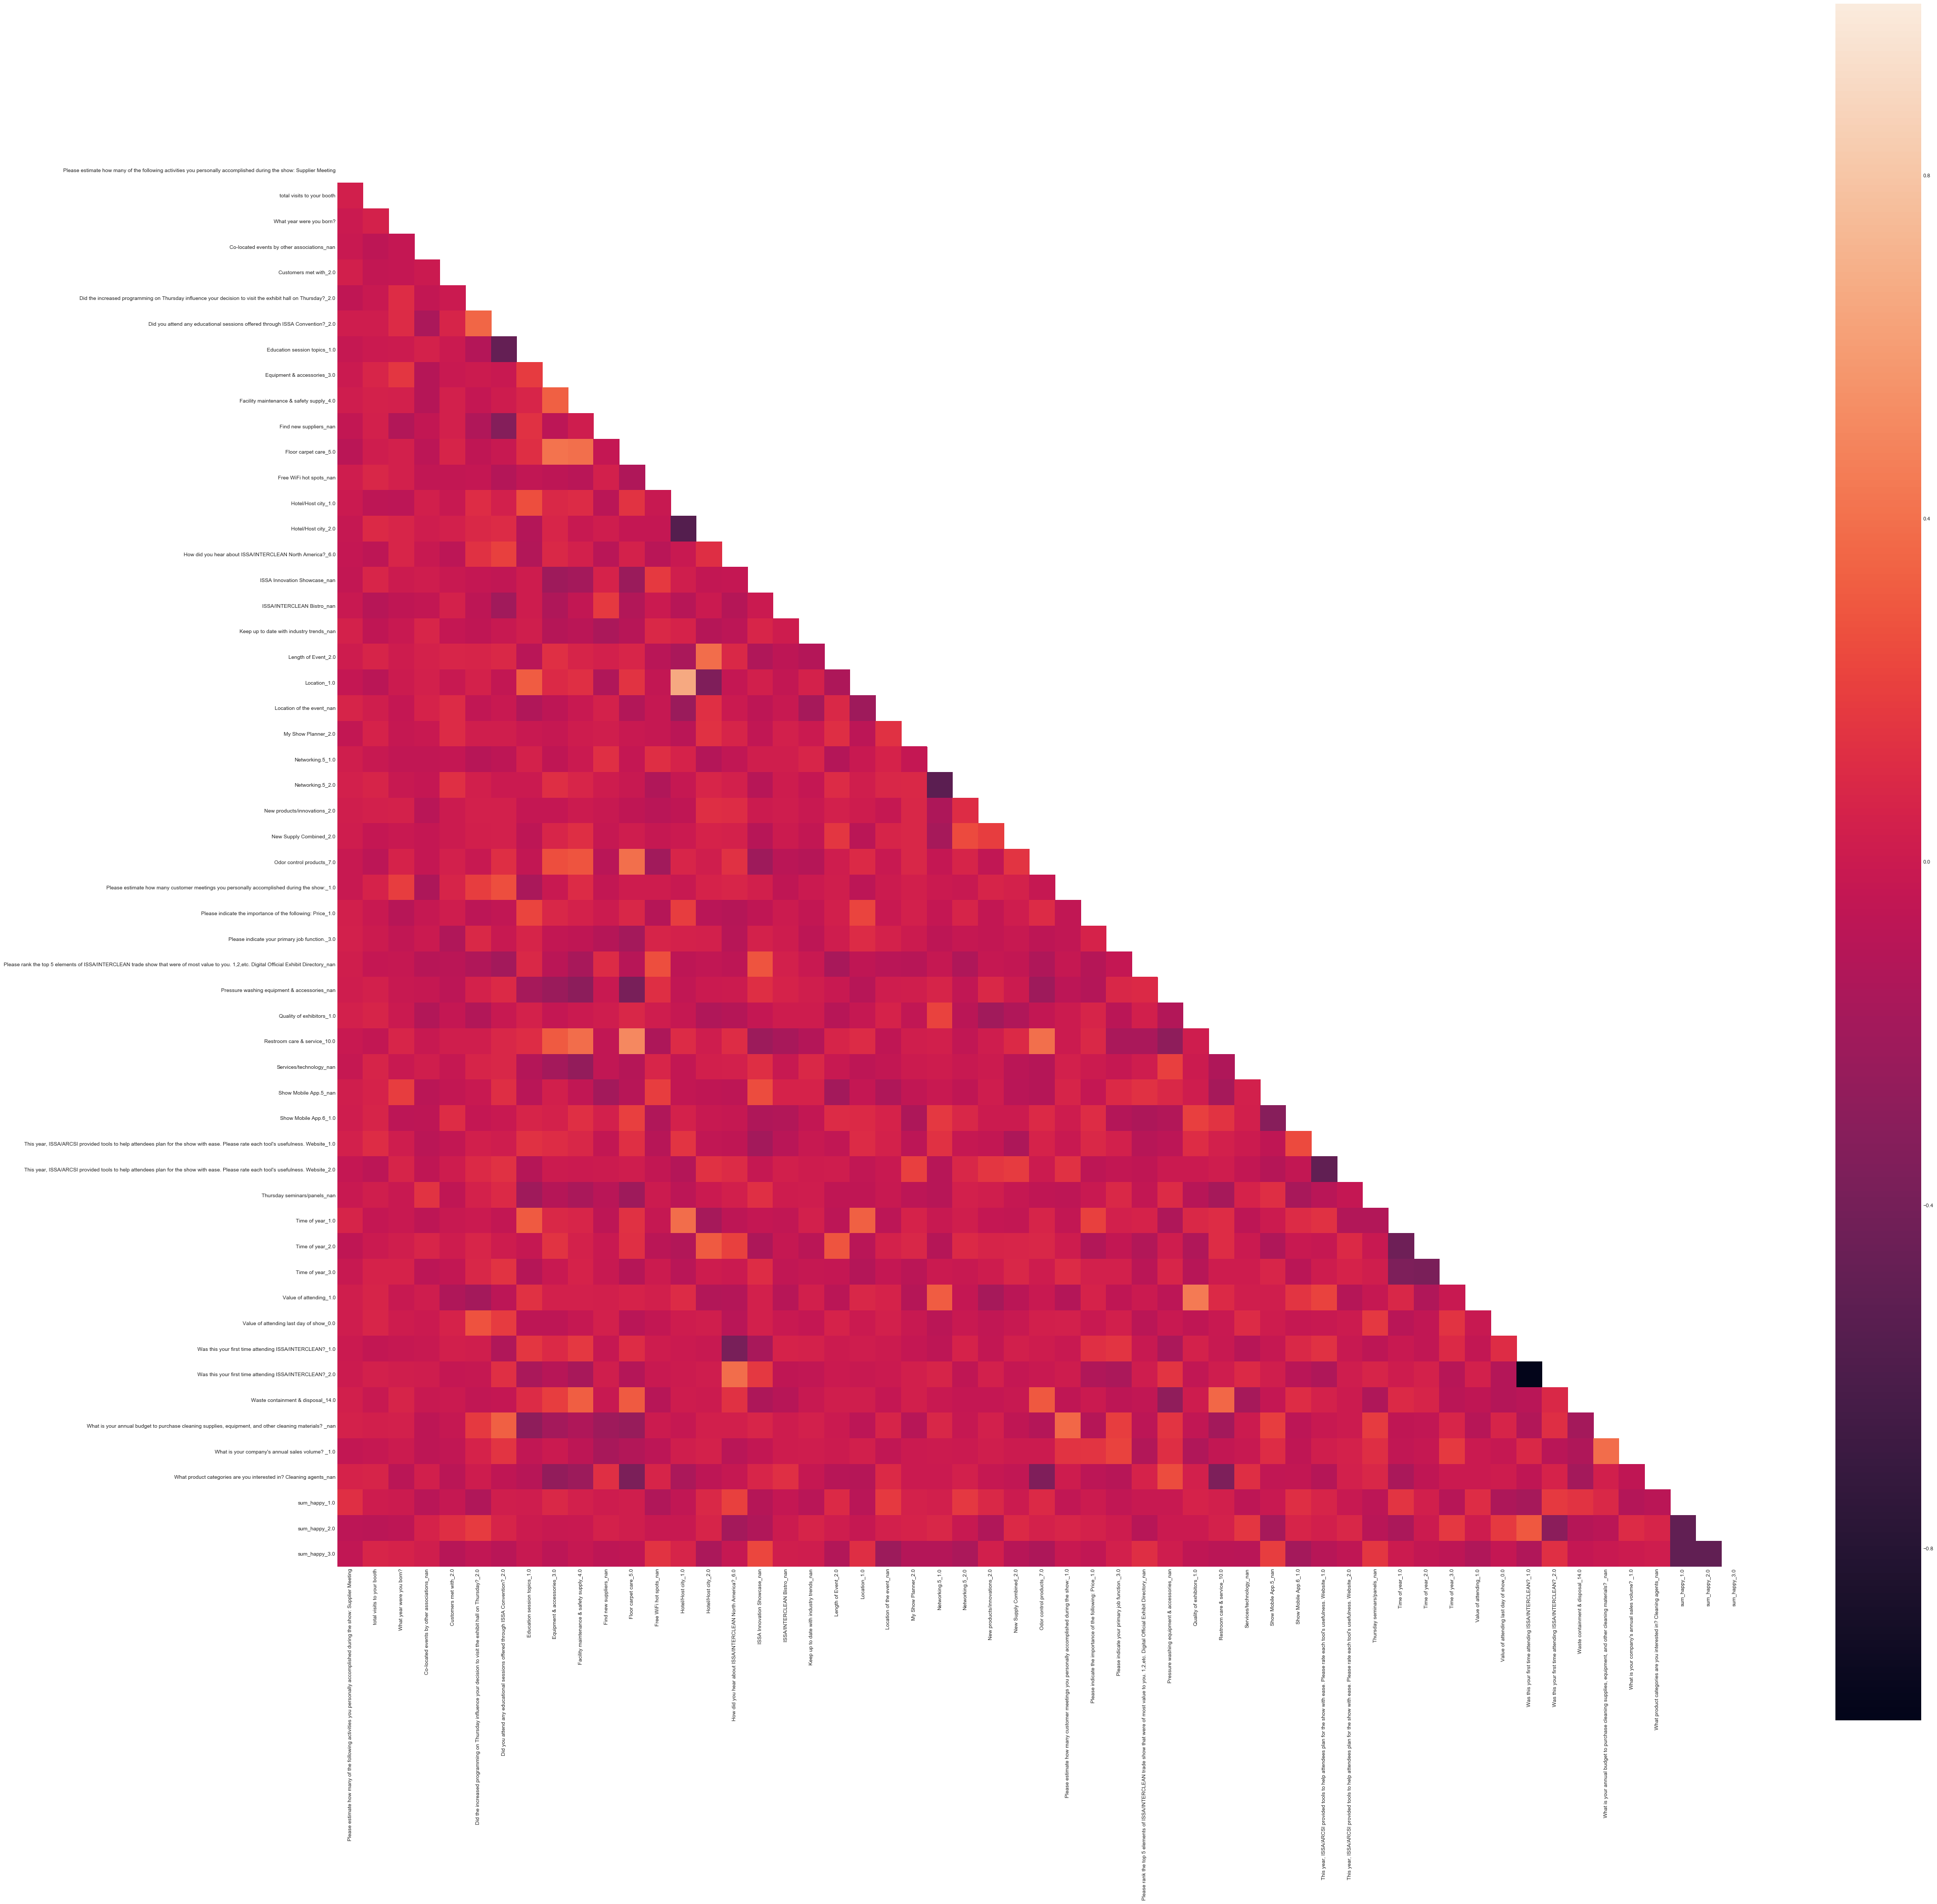

In [379]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
H.shape

In [392]:
H = H[H['sum_happy'] == 2]

In [279]:

corr = H.select_dtypes(include = ['int64', 'float64', 'uint8']).iloc[:, 1:].corr()

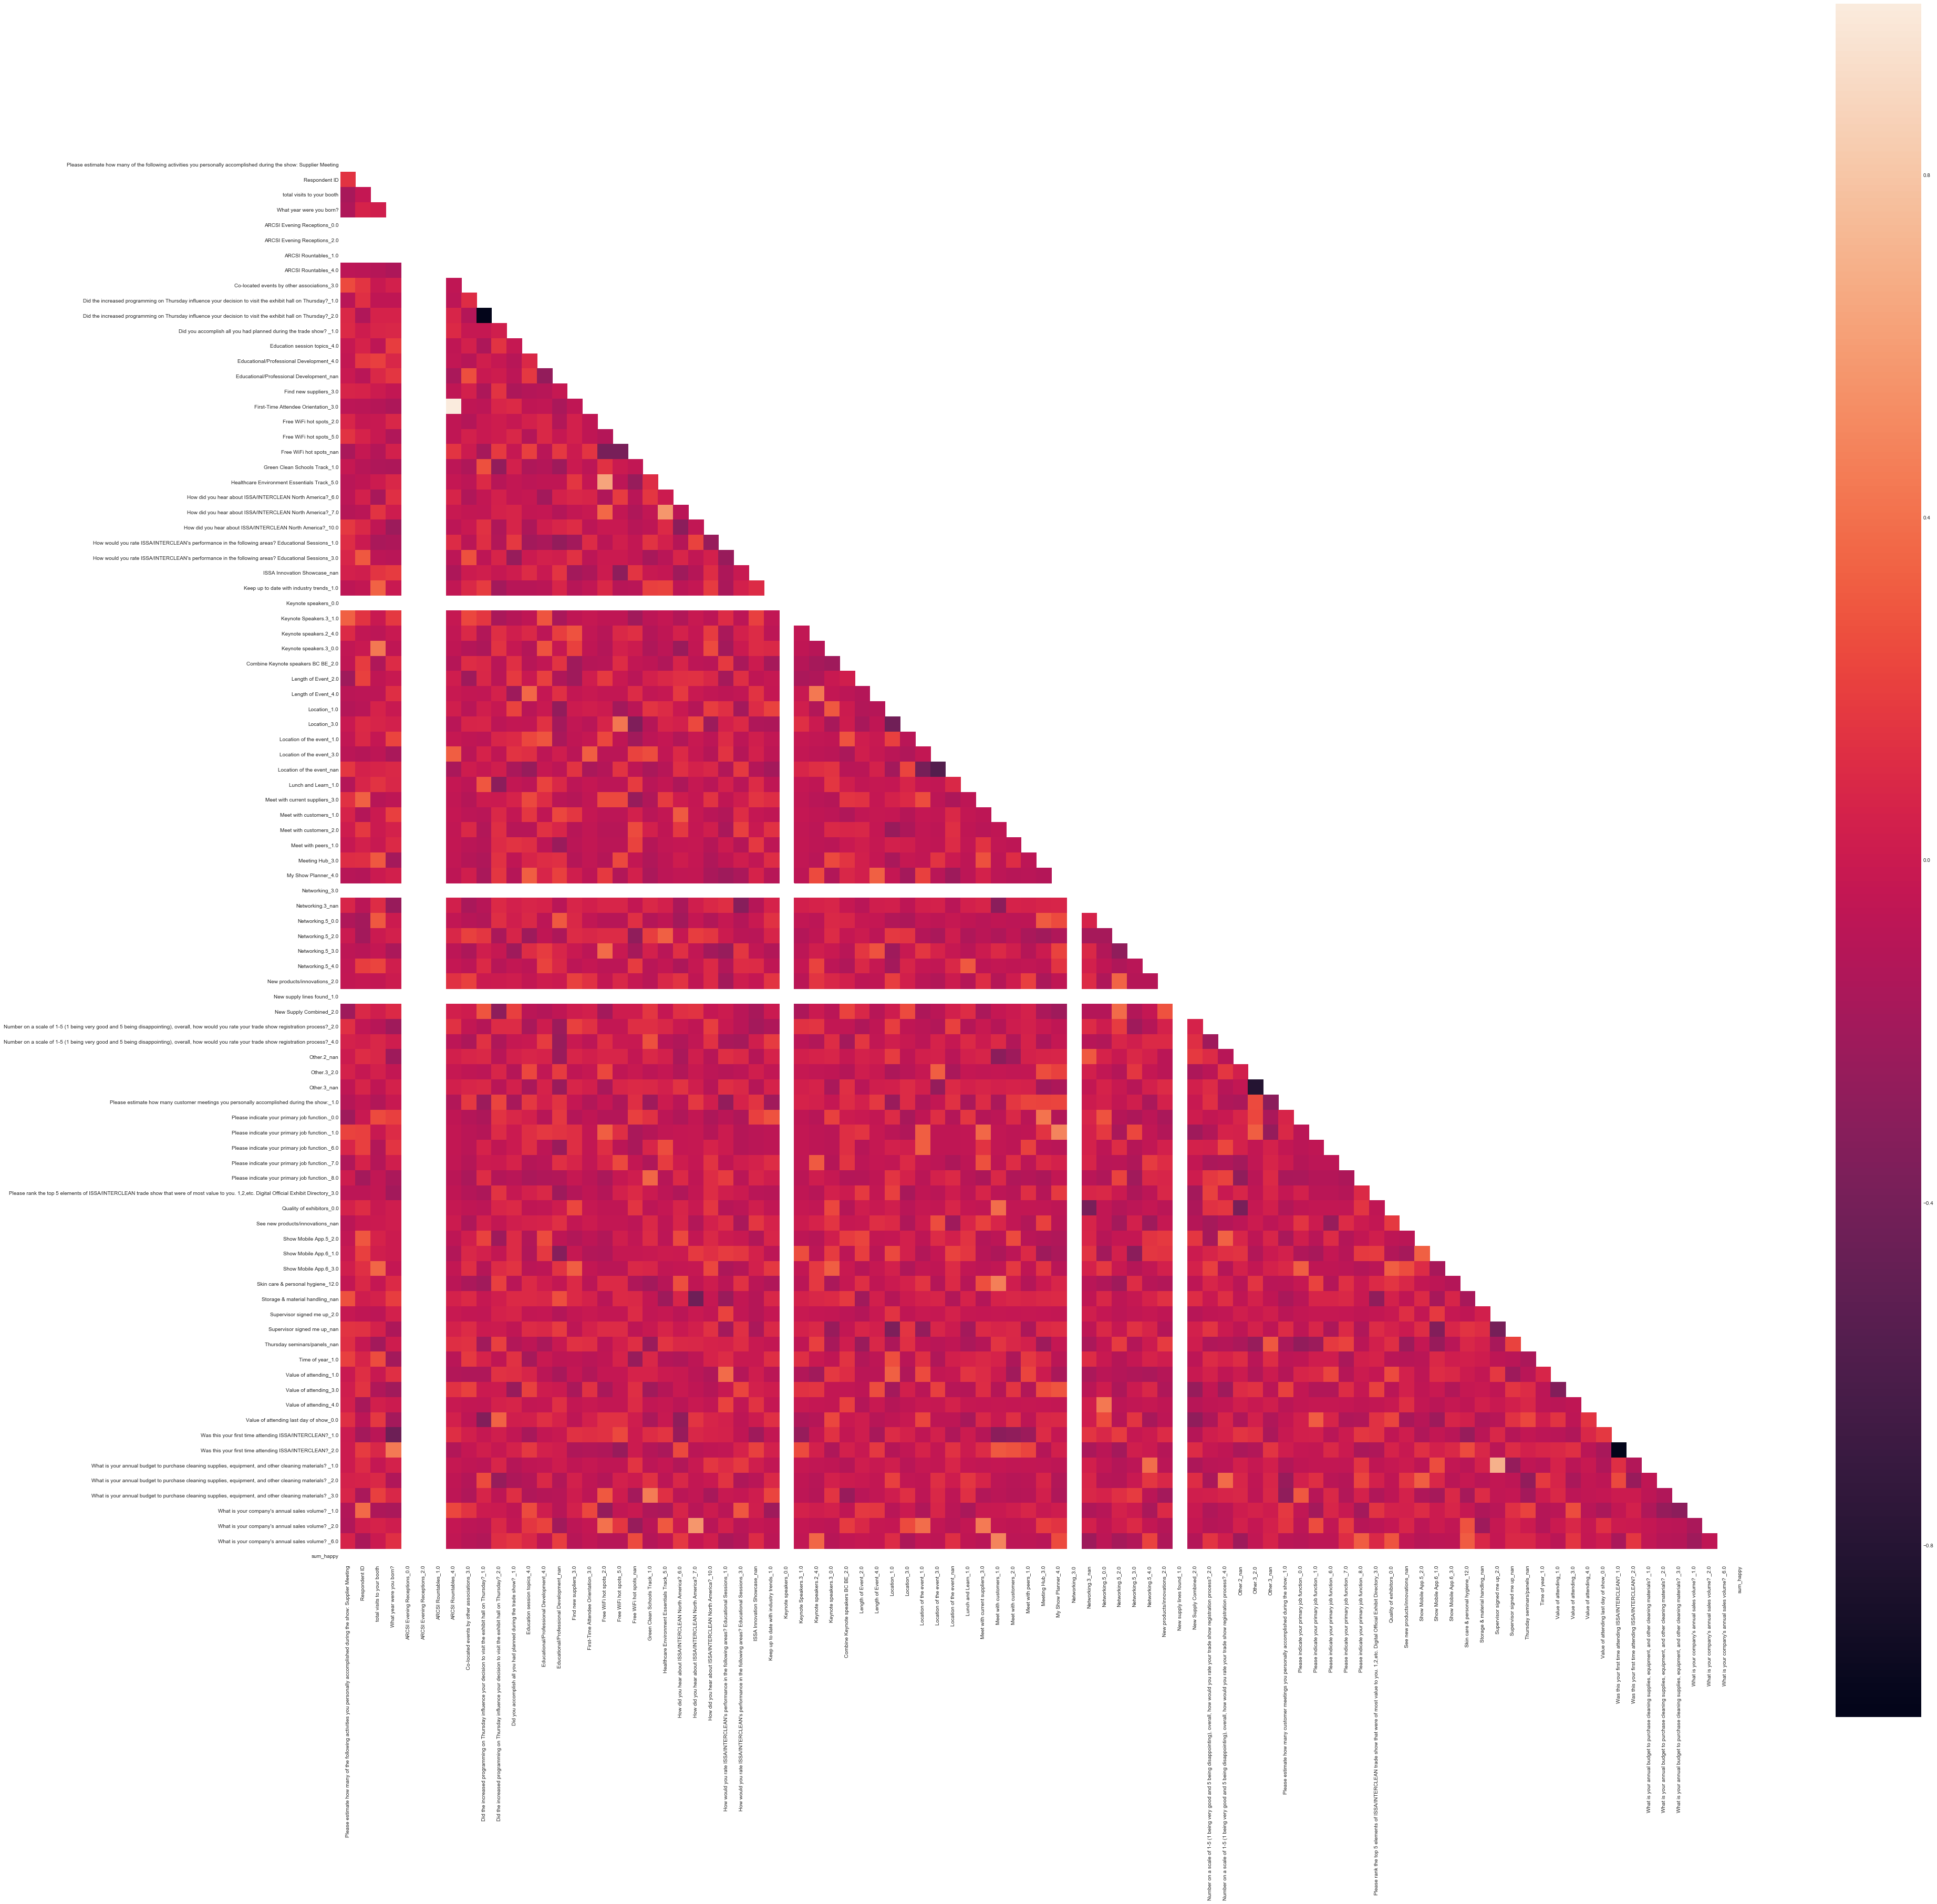

In [280]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [393]:
G=  G[G['sum_happy'] == 1]

In [ ]:
G.shape

In [282]:

corr = G.select_dtypes(include = ['int64', 'float64', 'uint8']).iloc[:, 1:].corr()

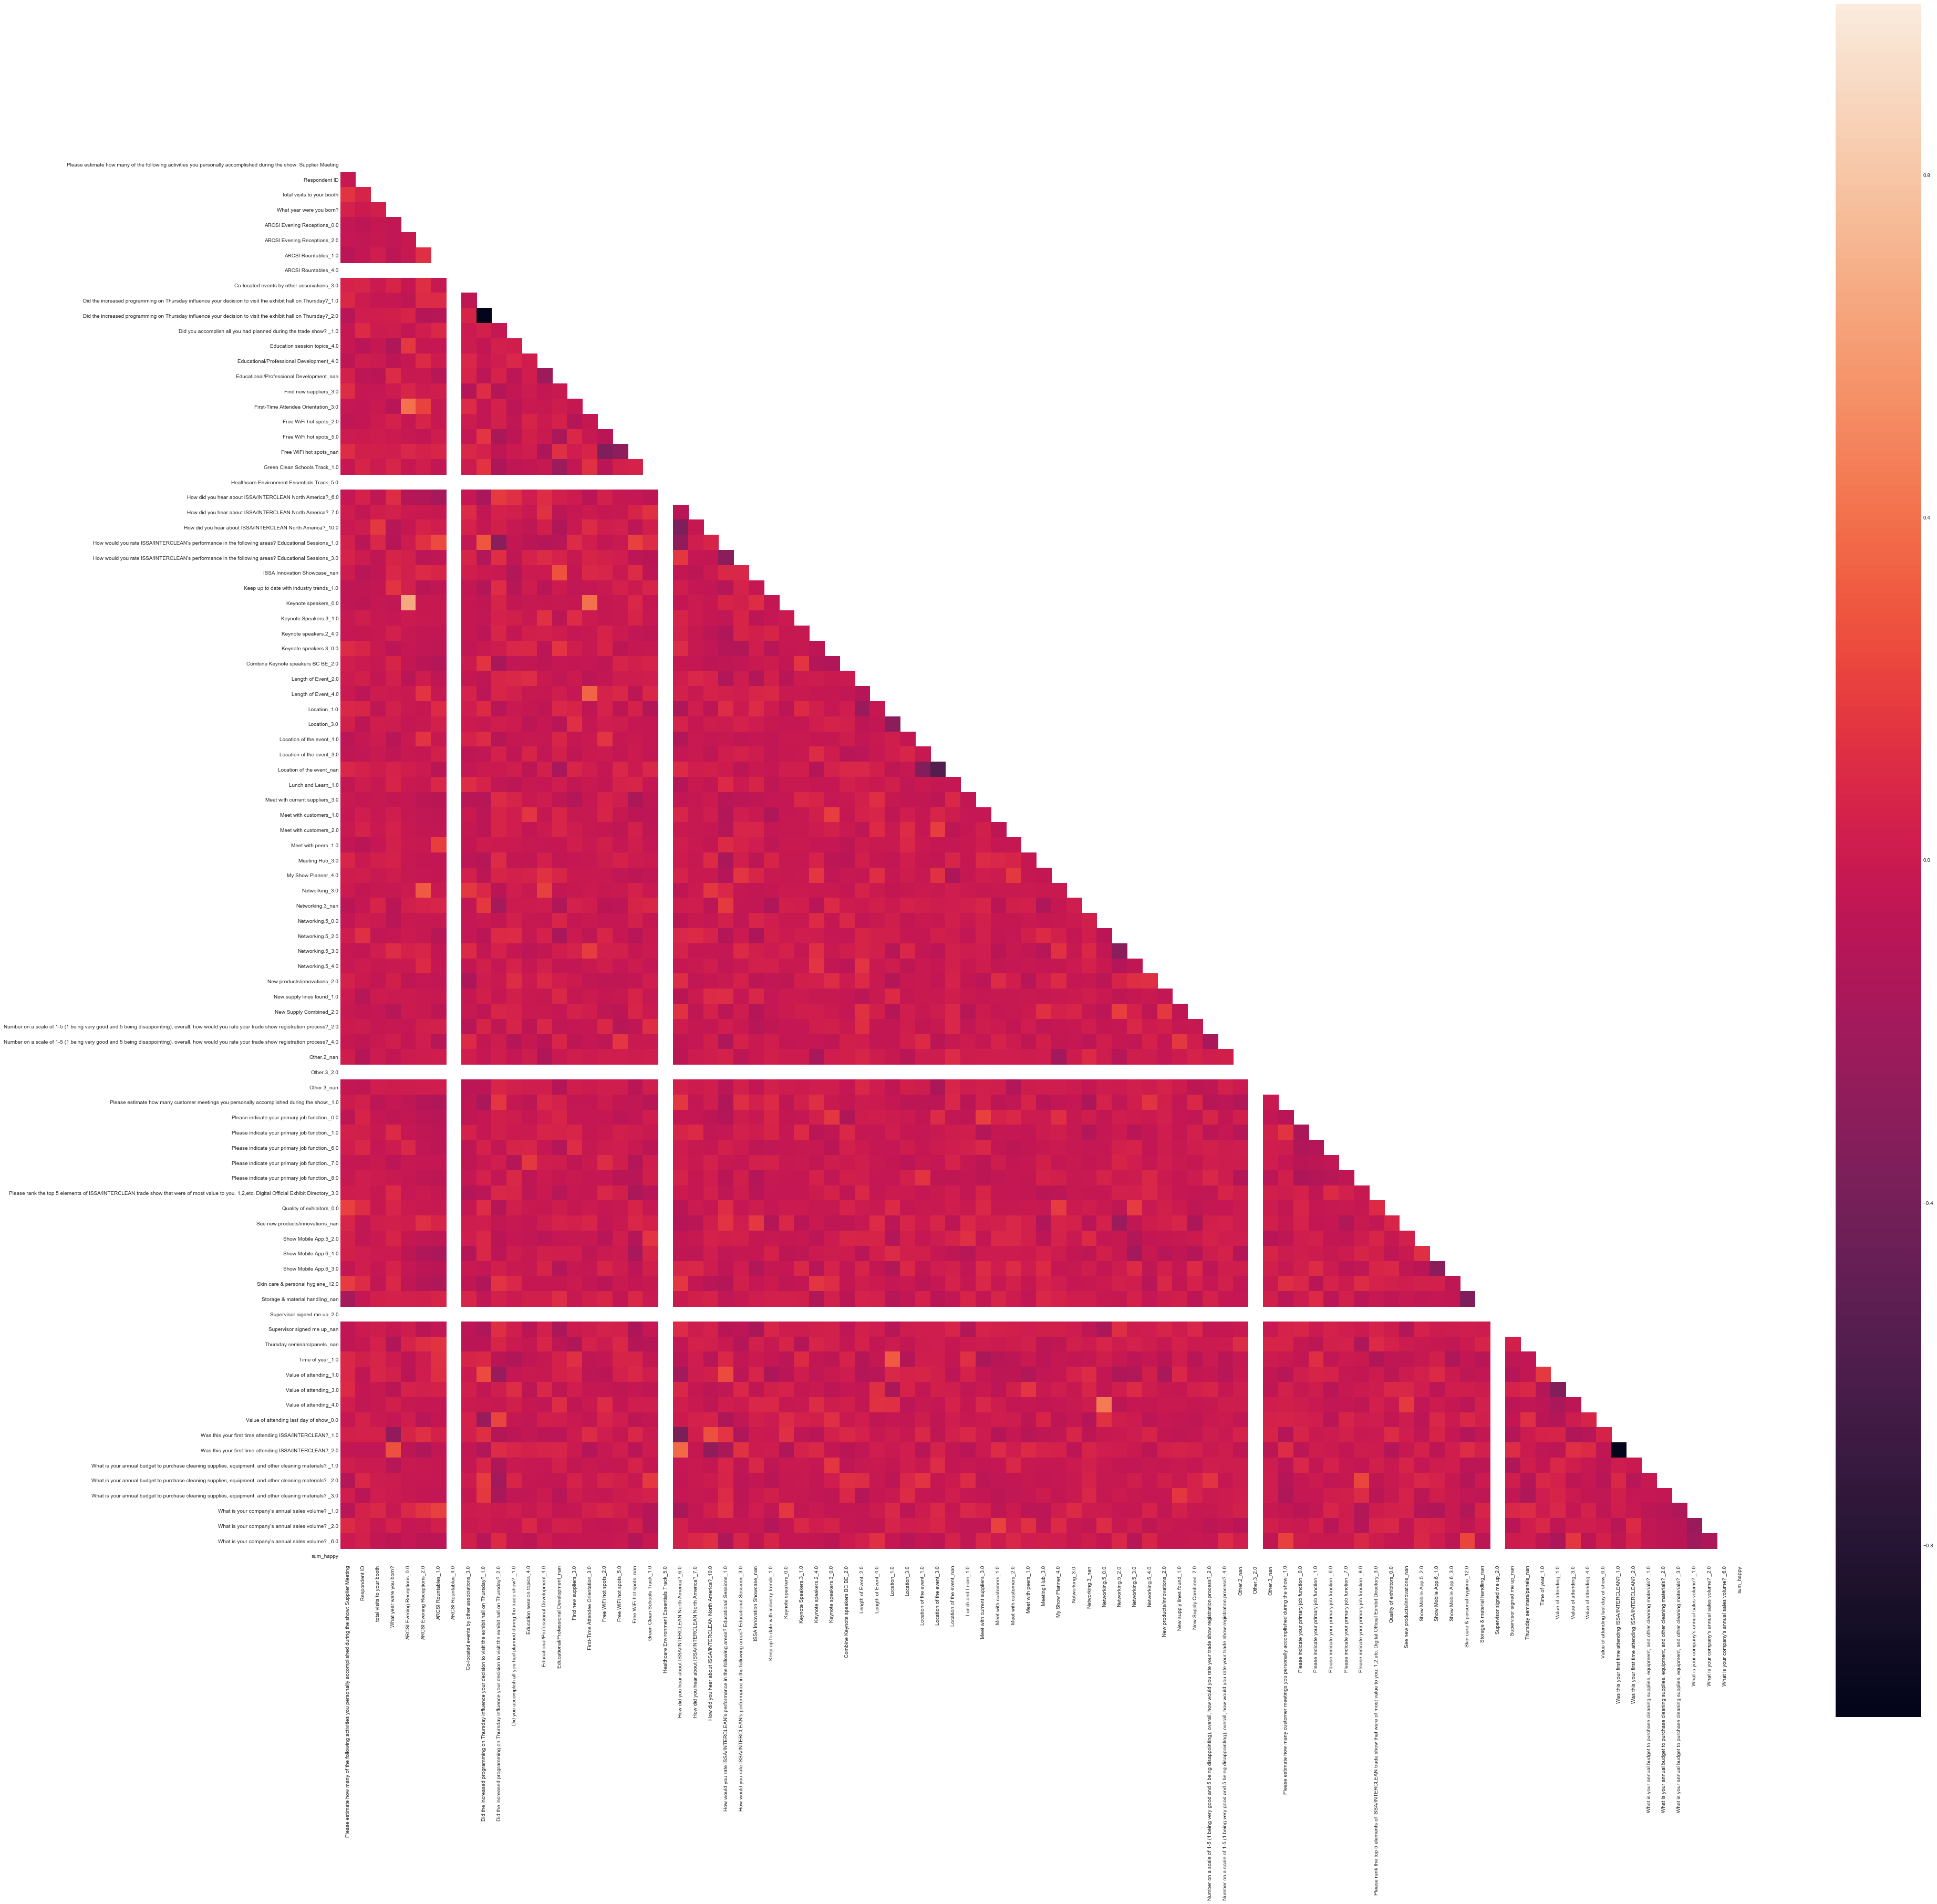

In [283]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [287]:
top_9_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_9_important_features.append(b)
        print b, X.columns[b]

5 ARCSI Evening Receptions_0.0
7 ARCSI Rountables_4.0
21 Healthcare Environment Essentials Track_5.0
28 Keynote speakers_0.0
37 Location of the event_1.0
49 Networking.5_0.0
54 New supply lines found_1.0
58 Other.2_nan
59 Other.3_2.0


In [288]:
new_X = X.iloc[:,top_9_important_features]
X = new_X

In [318]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.696078 (0.064587)
Ridge: 0.106565 (0.108745)
LDA: 0.725490 (0.057501)
NB: 0.664706 (0.177870)
CART: 0.719608 (0.054091)
KNeighborsClassifier: 0.696078 (0.041363)
XGBClassifier: 0.703922 (0.061037)
GradientBoostingClassifier: 0.719608 (0.054091)
AdaBoostClassifier: 0.721569 (0.056693)
RandomForestClassifier: 0.717647 (0.058298)
ExtraTreesClassifier: 0.719608 (0.054091)
DecisionTreeClassifier: 0.719608 (0.054091)


In [326]:
estimator = LogisticRegression(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 3
Feature Ranking: [4 2 1 7 3 1 1 5 6]


In [362]:
model = LogisticRegression(random_state = seed)
fit = model.fit(X,y)
abs(fit.coef_[0])

array([ 1.09799335,  1.47985877,  1.26424825,  0.8219184 ,  1.31576855,
        1.71303438,  1.54614126,  0.80958656,  1.26424825])

In [291]:
Z=[]
Z=pd.concat([X,y],axis=1)

In [295]:
corr = Z.select_dtypes(include = ['int64', 'float64','uint8']).iloc[:, 1:].corr()

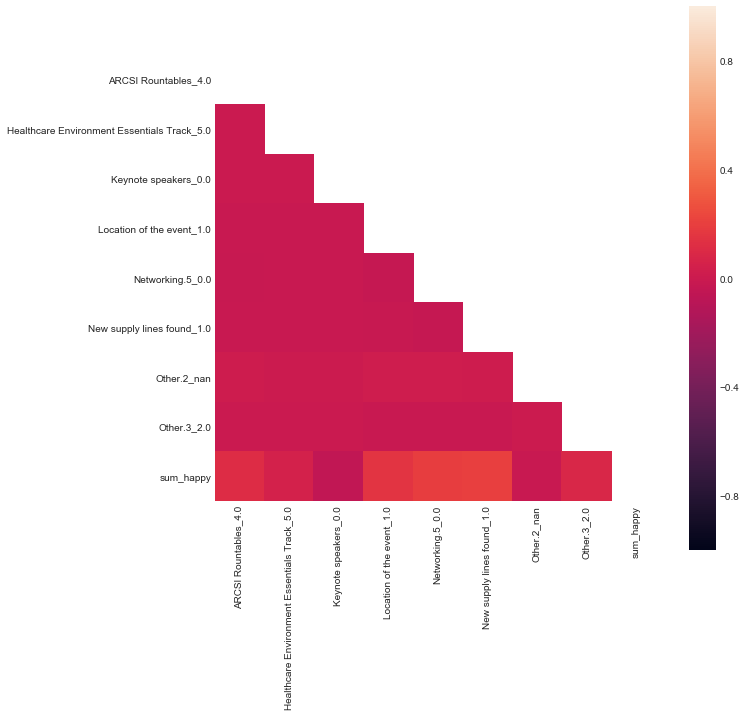

In [296]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [297]:
G = Z

In [298]:
H = Z

In [299]:
Z = Z[Z['sum_happy'] == 3]

In [300]:
corr = Z.select_dtypes(include = ['int64', 'float64','uint8']).iloc[:, 1:].corr()

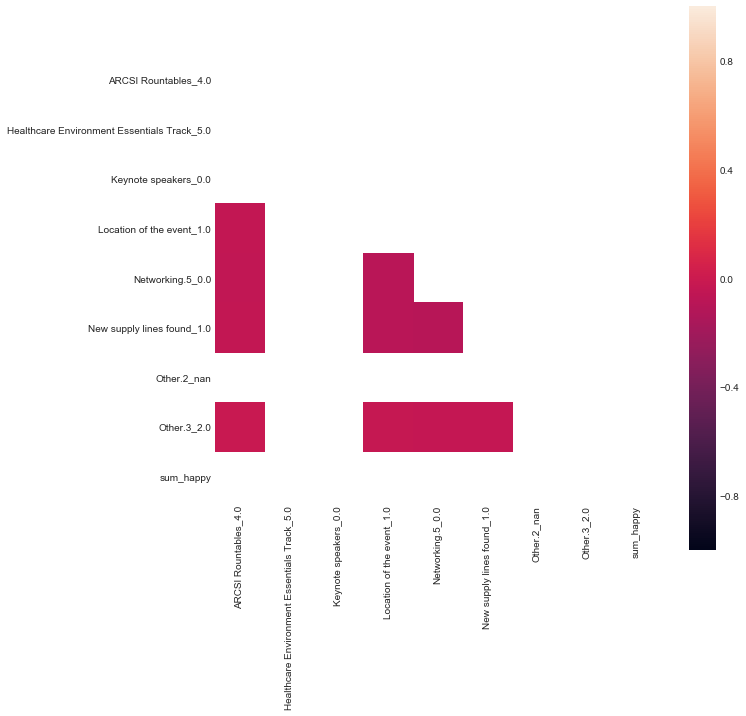

In [301]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [305]:
H = H[H['sum_happy'] == 2]

In [307]:
corr = H.select_dtypes(include = ['int64', 'float64','uint8']).iloc[:, 1:].corr()

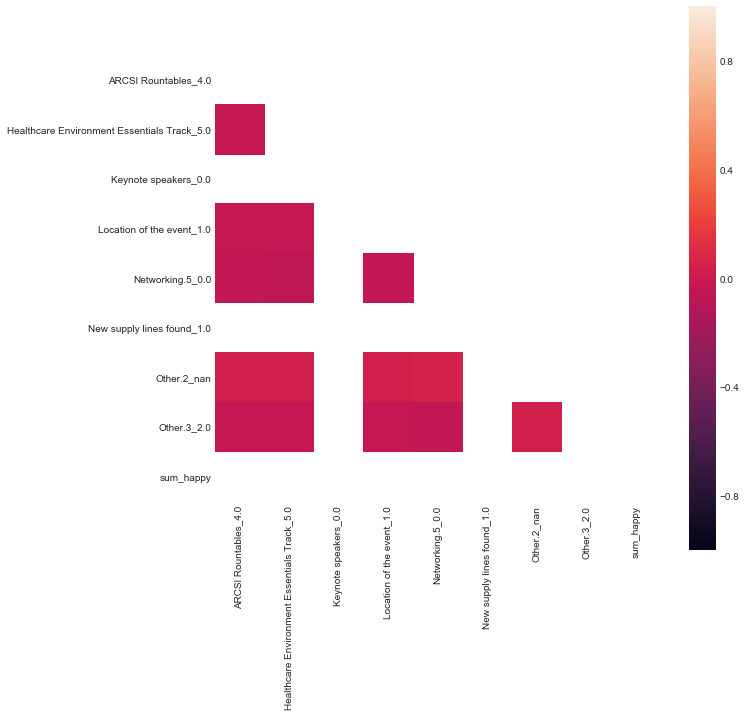

In [308]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [311]:
G = G[G['sum_happy'] == 1]

In [312]:
corr = G.select_dtypes(include = ['int64', 'float64','uint8']).iloc[:, 1:].corr()

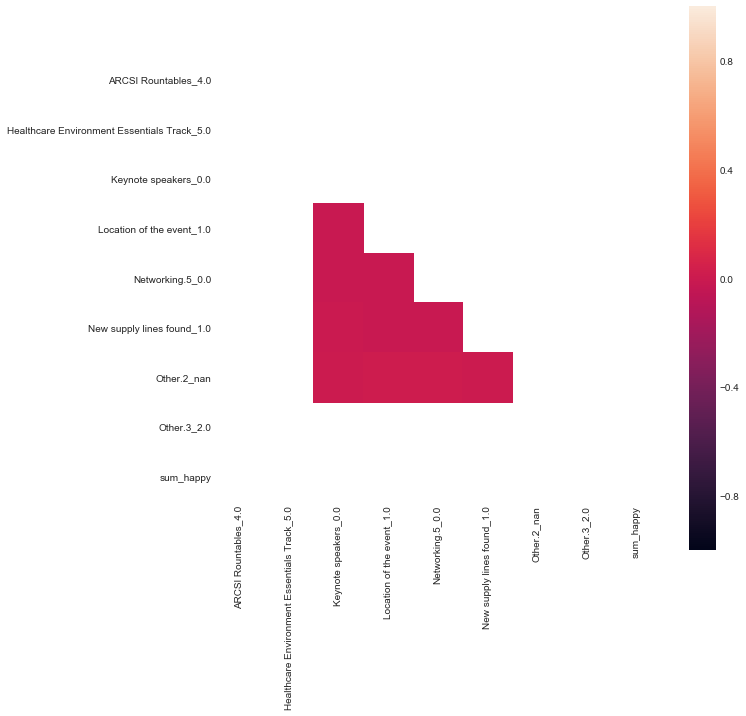

In [313]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
sum_pos = Z.loc[(Z['sum_happy']==3) | Z['sum_happy']==1]

In [ ]:
sum_pos

In [ ]:
corr = sum_pos.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
sum_neg = Z.loc[Z['sum_happy']==1]

In [ ]:
corr = sum_neg.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
estimator = xgb.XGBClassifier()
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


In [ ]:
estimator = RandomForestClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


In [ ]:
estimator = LogisticRegression(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
estimator = AdaBoostClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
fit.grid_scores_.sort()

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_)
plt.figure(figsize=(150,150))
plt.show()

In [ ]:
model=[]
model = KNeighborsClassifier(n_neighbors = 3,)
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
msg = cv_results.mean(), cv_results.std()
print(msg)


In [ ]:
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] ==1:
        print b, X.columns[b]

In [ ]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator, cv= kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
for a in range(1,11):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
butter = fit.grid_scores_.sort()


In [ ]:
fit.grid_scores_

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_)
plt.figure(figsize=(150,150))
plt.show()

In [ ]:
X.columns

In [ ]:
print('Feature  Accuracy')
for i in range(n_feats):
    X = iris.data[:, i].reshape(-1, 1)
    scores = cross_val_score(clf, X, y)
    print('%d        %g' % (i, scores.mean()))

In [ ]:
model = KNeighborsClassifier()
the_list = []
the_column = []
rfe = RFE(model,1)
fit = rfe.fit(X,y)

    #print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
rfe = RFE(model,1 )
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
model = ExtraTreesClassifier(random_state = seed)
the_list = []
the_column = []
rfe = RFE(model,1)
fit = rfe.fit(X,y)
          
print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]
print("Optimal number of features : %d" % fit.n_features_)
print("Feature Ranking: %s") % fit.ranking_   

In [ ]:
print("Optimal number of features : %d" % rfe.n_features_)

In [ ]:
print( rfe.ranking_)

In [ ]:
print( rfe.ranking_)

In [ ]:
model = KNeighborsClassifier()
the_list = []
the_column = []
fit = rfe.fit(X,y)
rfe = RFE(model,1)
    #print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
#models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', probability = True, random_state = seed)))

In [ ]:
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)

In [ ]:

def test_ensemble(elist,single_score):
    
    for l in range(0, len(elist)):
        model1=elist[l]
        for j in range((l+1), len(elist)):
            model2=elist[j]
            for k in range((j+1), len(elist)):
                model3=elist[k]
                estimators=[]
                estimators.append(model1)
                estimators.append(model2)
                estimators.append(model3)
                #try:
                    
                ensemble = VotingClassifier(estimators, voting='soft')
                cv_results = model_selection.cross_val_score(ensemble, X, y,scoring = None, cv=kfold) 
                if cv_results.mean() > single_score:
                    print estimators[0][0], estimators[1][0], estimators[2][0]
                    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
                    print msg
                
                 
                
                #except:
                    #msg = " BREAK with: " + estimators[0][0], estimators[1][0],estimators[2][0]
                    #print msg
                    
           

In [ ]:
test_ensemble(models, 0.65)

In [ ]:
LDA ExtraTreesClassifier SVC

In [ ]:
estimators=[]
model1 = LinearDiscriminantAnalysis()
estimators.append(('LDA', model1))
model2 = ExtraTreesClassifier(random_state = seed)
estimators.append(('ExtraTreesClassifier', model2))
model3 = SVC(kernel = 'linear', probability = True, random_state = seed)
estimators.append(('SVC', model3))
ensemble = VotingClassifier(estimators, voting='soft')
ensemblefit = ensemble.fit(X,y)
rfe = RFE(ensemblefit,1)
fit = rfe.fit(X,y)
#kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
#cv_results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring) 
#msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print( fit.ranking_)


In [ ]:
estimators = []
model1 = ExtraTreesClassifier(random_state = seed)
estimators.append(('ExtraTreesClassifier', model1))
model2 = KNeighborsClassifier()
estimators.append(('KNeighborsClassifier', model2))
model3 = GradientBoostingClassifier(random_state = seed)
estimators.append(('GradientBoostingClassifier', model3))


ensemble = VotingClassifier(estimators, voting='soft')
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
cv_results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring) 
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print msg

In [ ]:
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
estimators = []
model1 = ExtraTreesClassifier()
estimators.append(('ExtraTreesClassifier', model1))
model2 = KNeighborsClassifier()
estimators.append(('KNeighborsClassifier', model2))
model3 = GradientBoostingClassifier()
estimators.append(('GradientBoostingClassifier', model3))


ensemble = VotingClassifier(estimators, voting='soft')
cv_results = model_selection.cross_val_score(ensemble, X, y,scoring = scoring, cv=kfold) 
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print msg

In [ ]:
GradientBoostingClassifier(n_estimators= 32, learning_rate= 0.1, random_state= 7, max_depth= 3)

In [ ]:
param_grid = {'n_estimators': [10,20,30], 'learning_rate': [.1,.01,.001], 'random_state': [7], 'max_depth': [2,3,5,7]}
local_cv(GradientBoostingClassifier(), param_grid)

In [ ]:
def local_cv(model, params):                             #KFOLD WITH GRID SEARCH
    param_grid = params
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    for params, mean_score, scores in grid_result.grid_scores_:
        print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [ ]:
Finding and recommendations,  The question you want to predict for, ask first in your survey, for optimal data collection